In [1]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


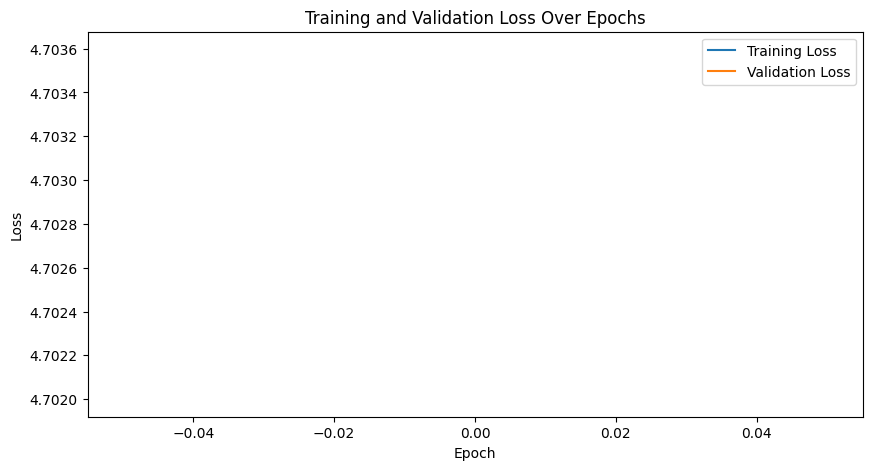

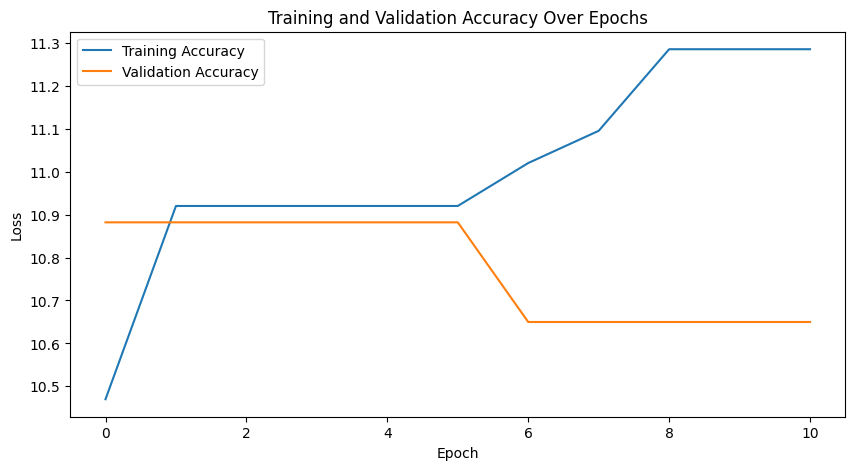

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

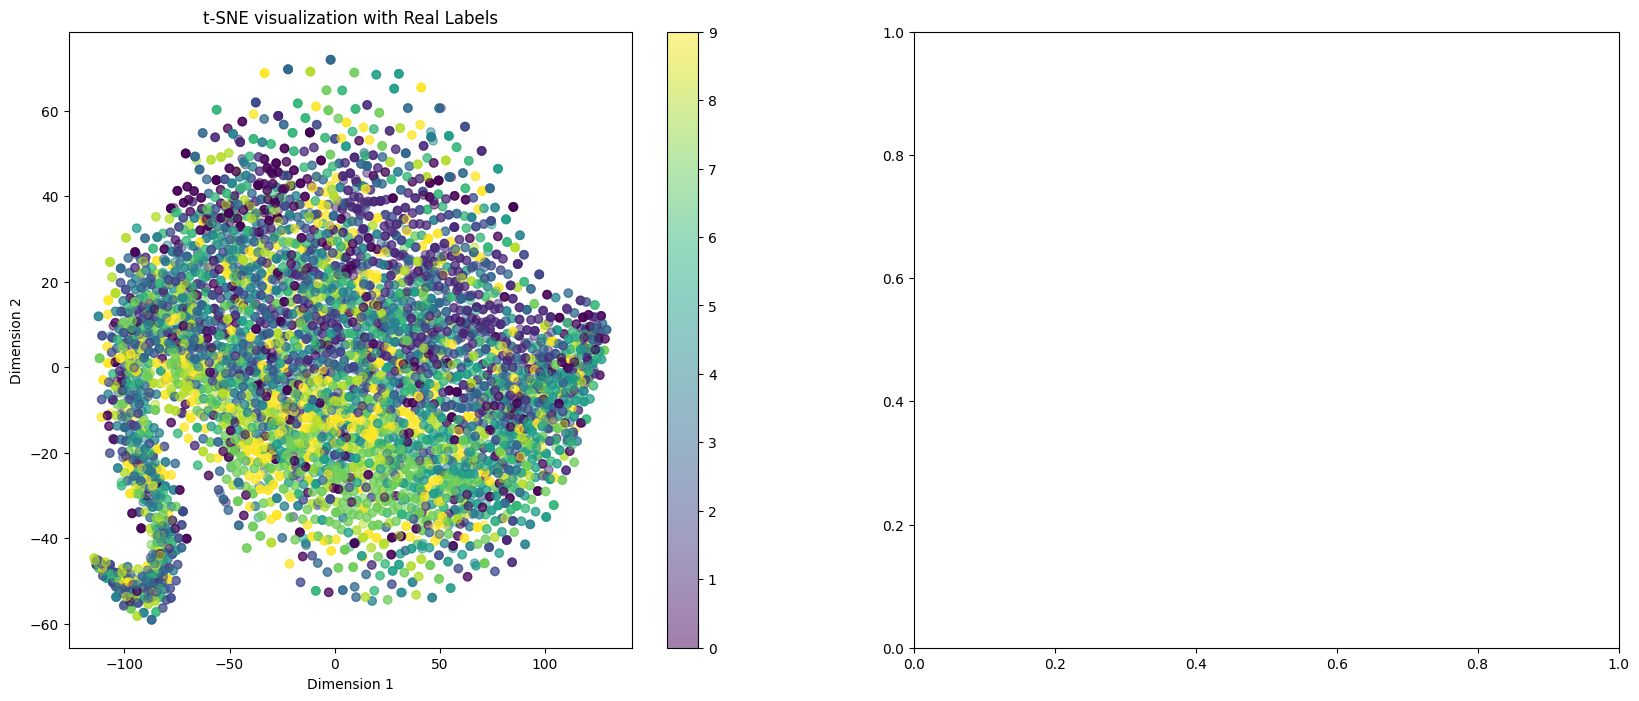

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10 - 20

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



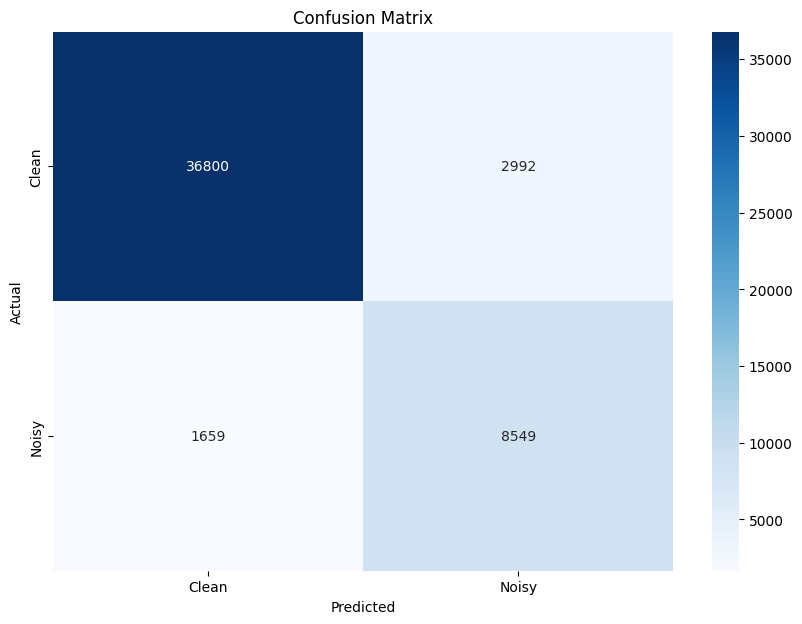

In [9]:
noise_cleaner.report(mistakes_count=9)

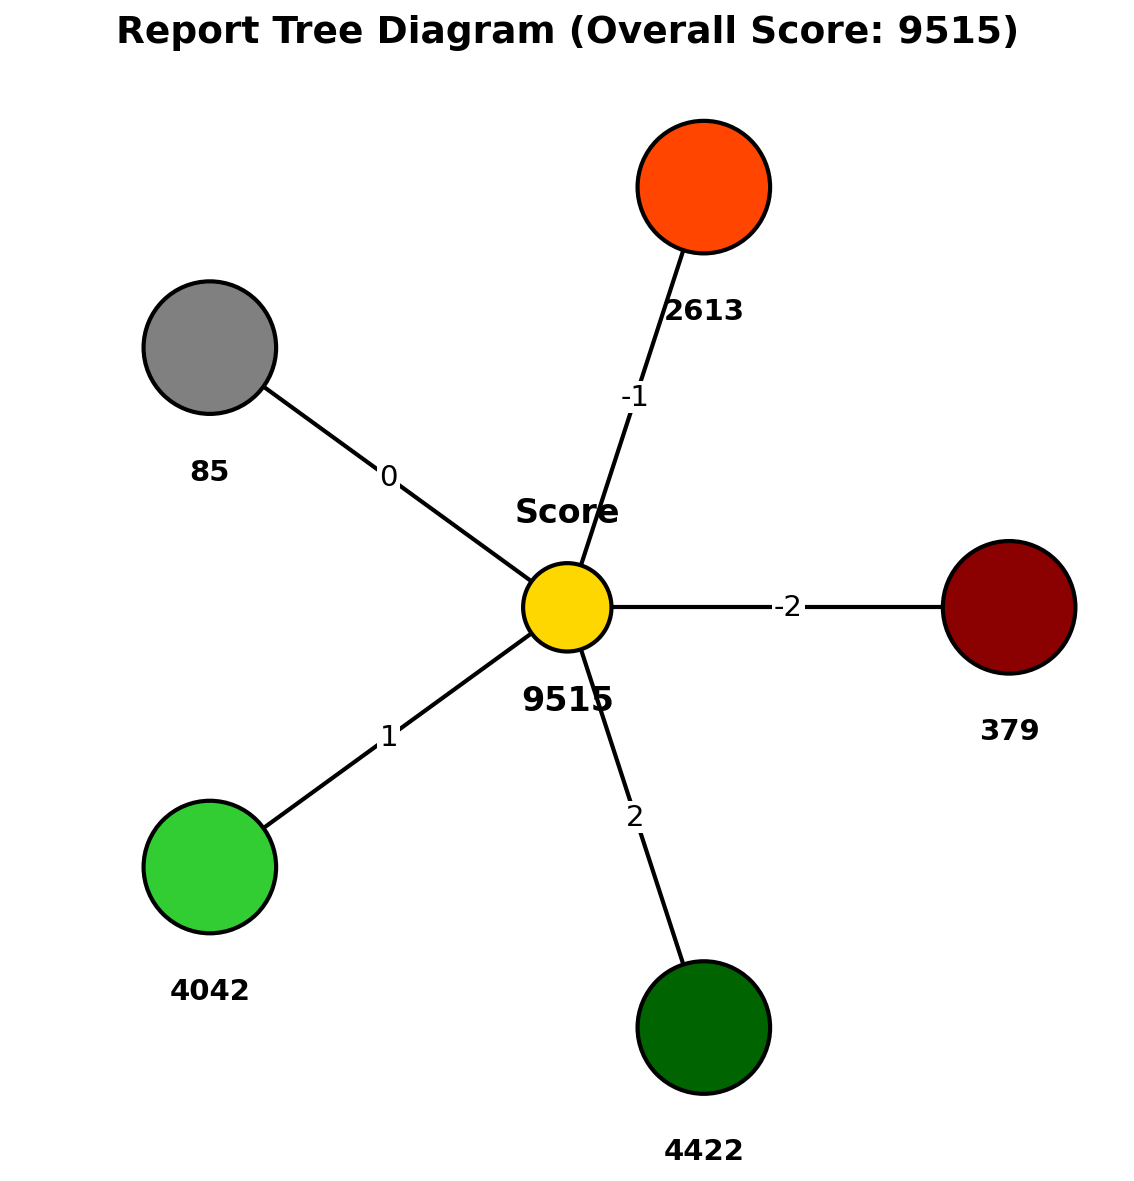

In [3]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=10)

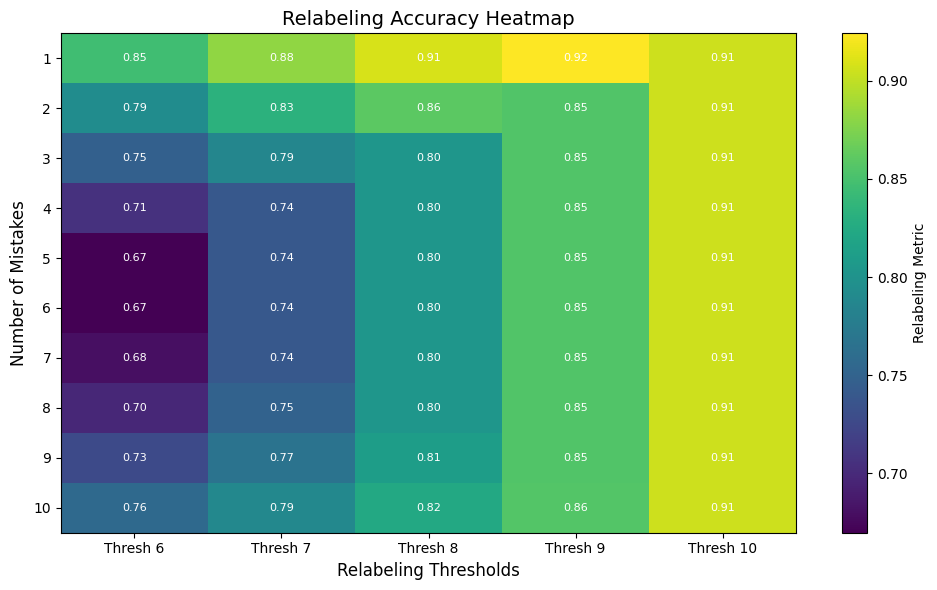

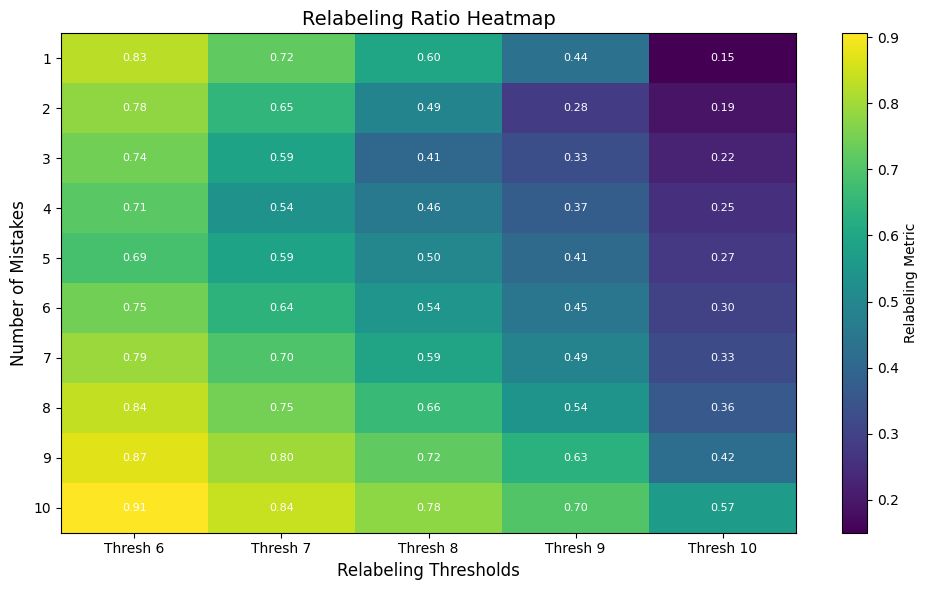

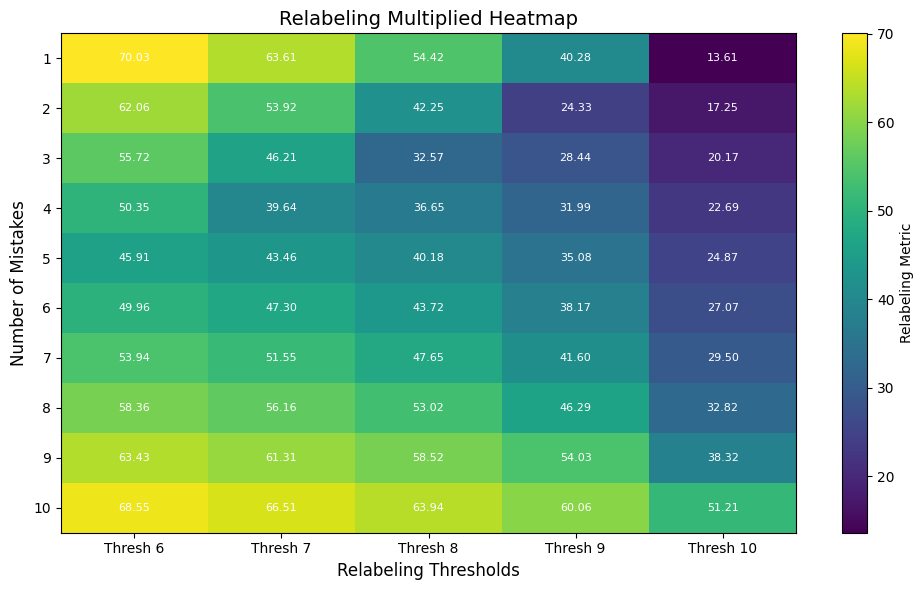

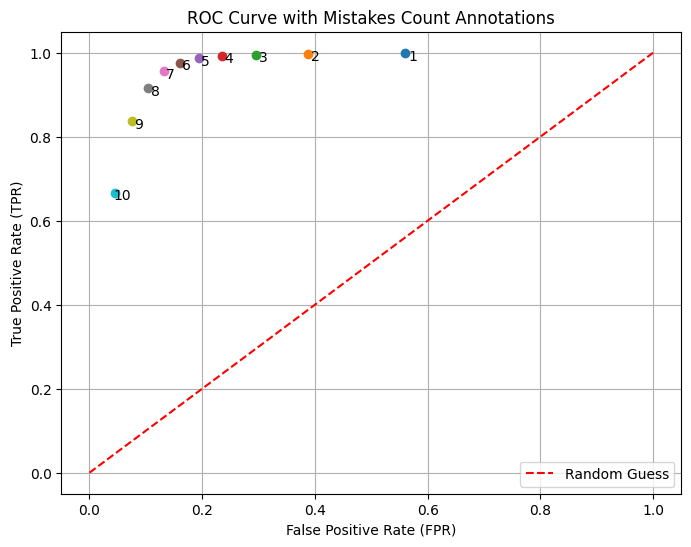

Area Under the Curve (AUC): 0.49907322987450103


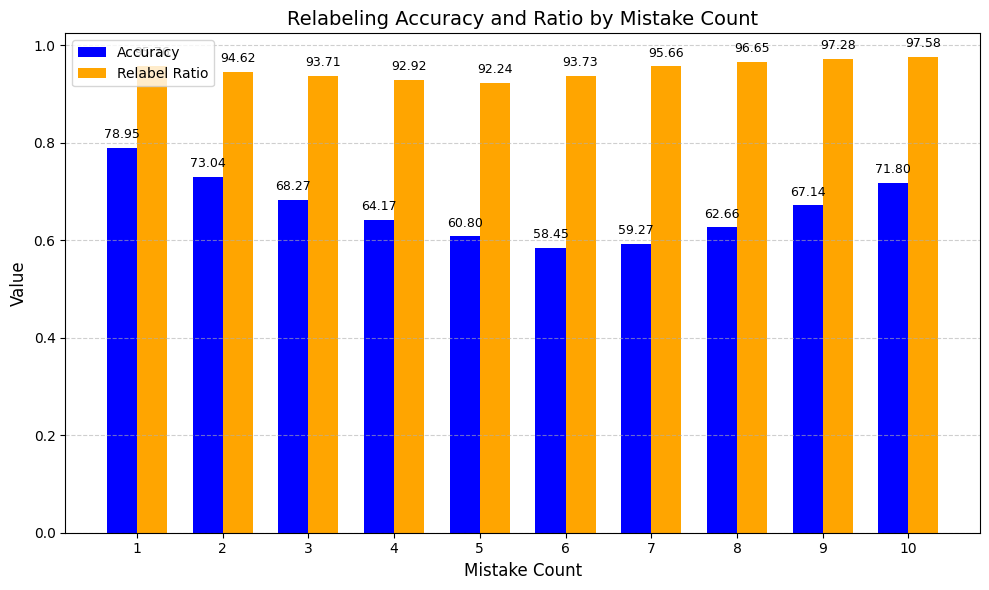

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



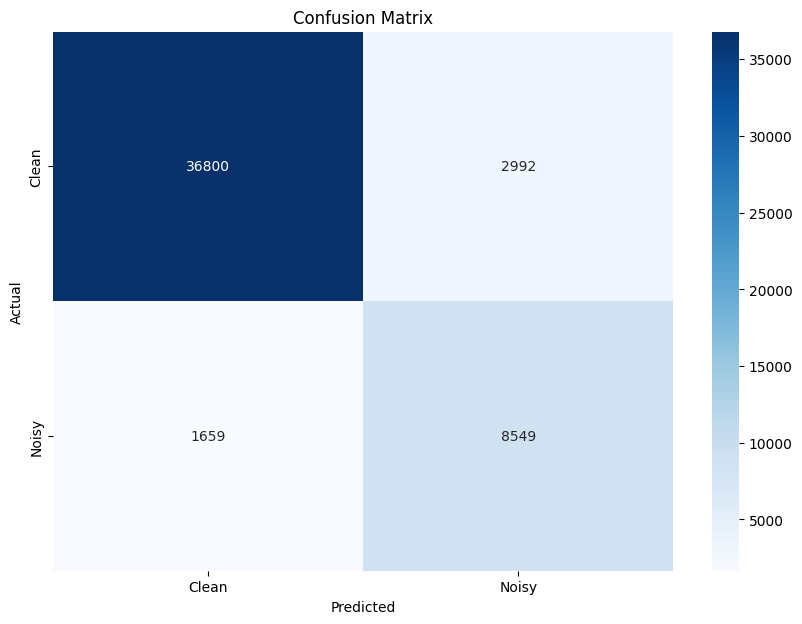

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



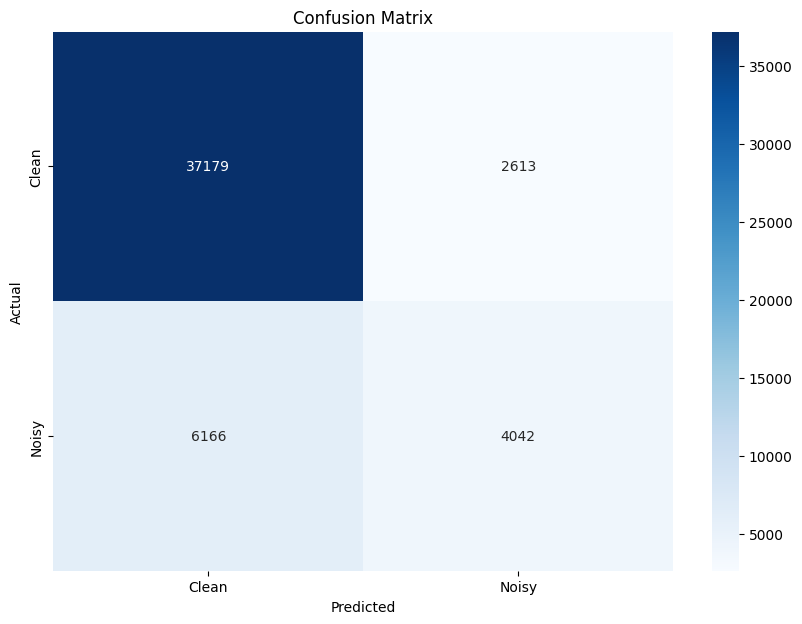

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


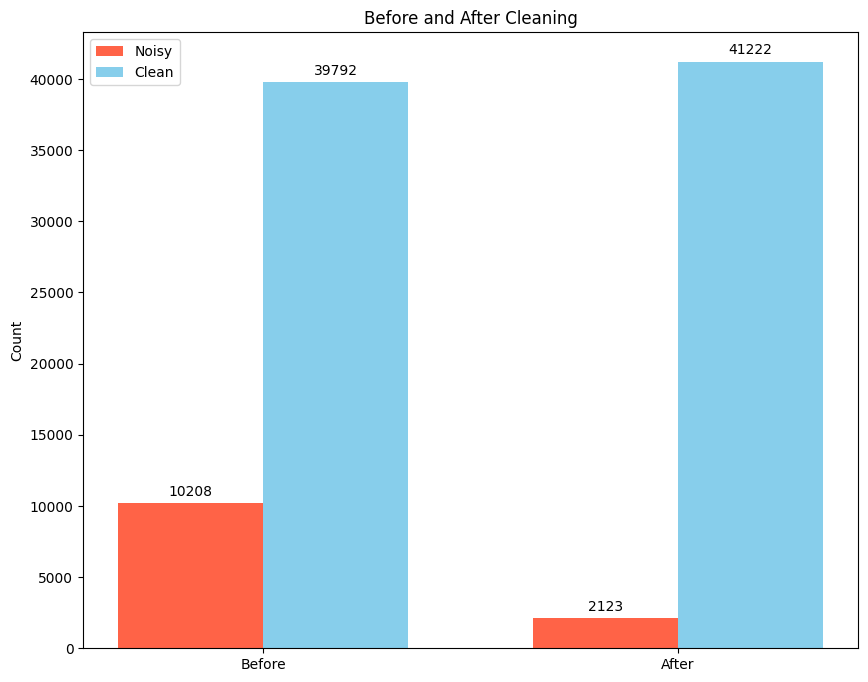

100%|██████████| 43345/43345 [05:45<00:00, 125.37it/s] 


Cleaned dataset saved to cleaned/Advanced-CIFAR10.pkl


In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

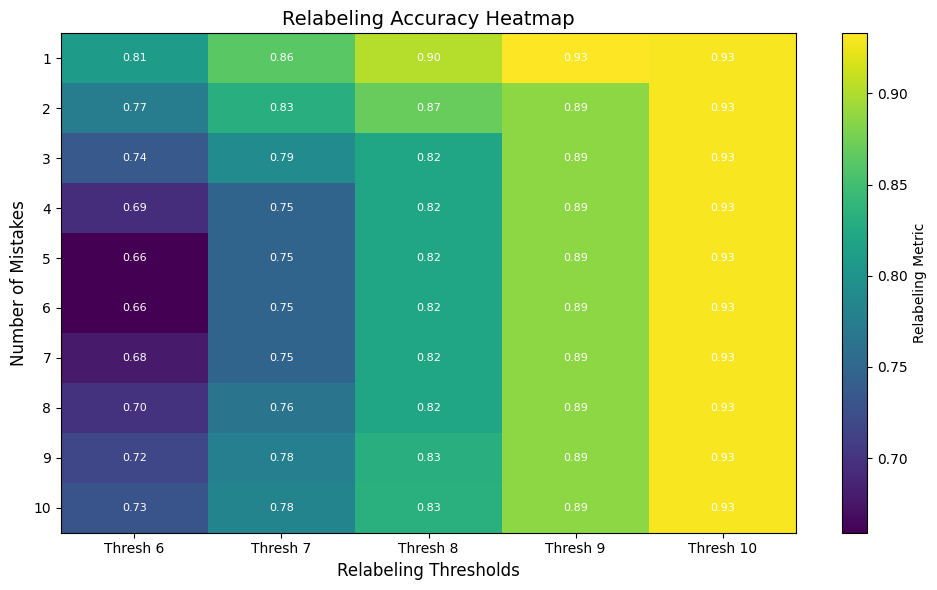

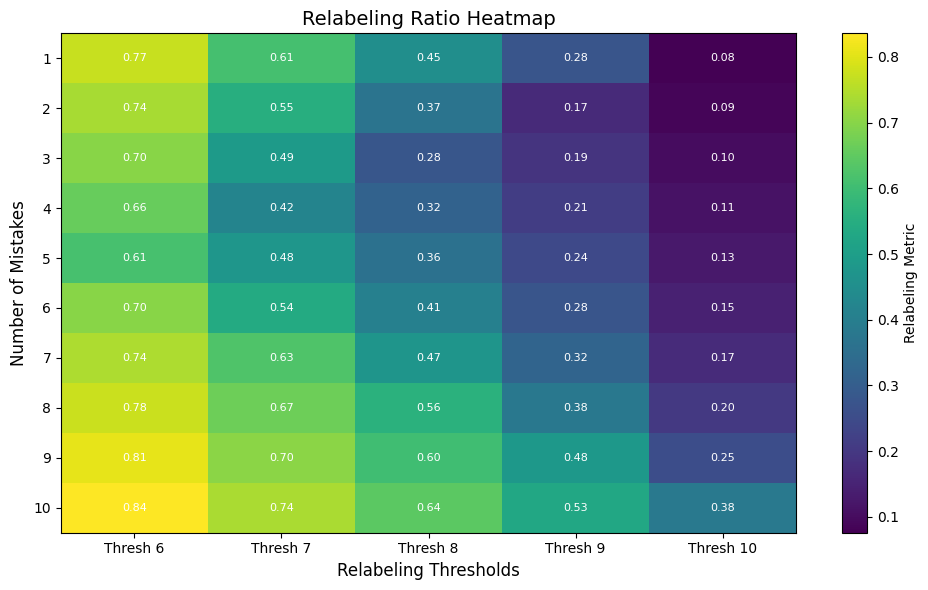

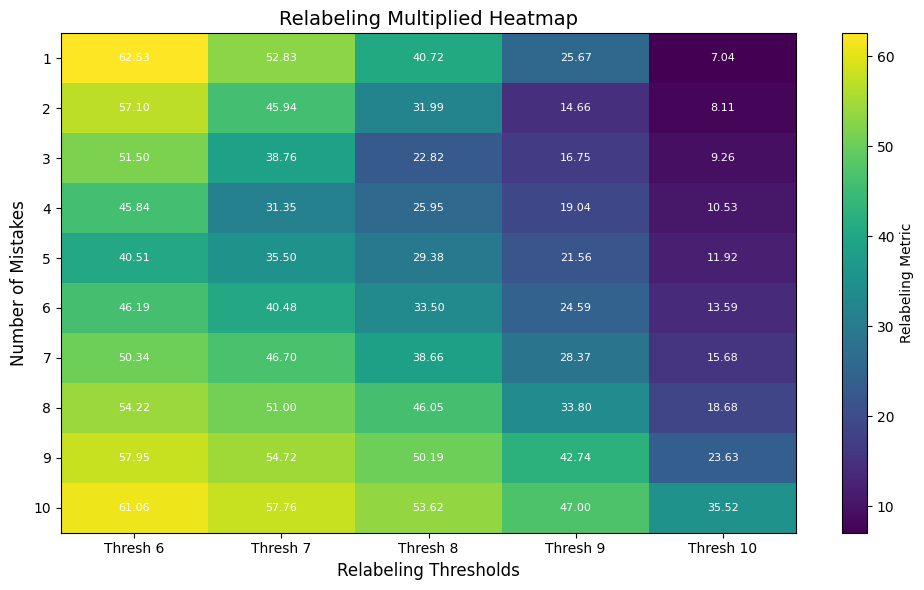

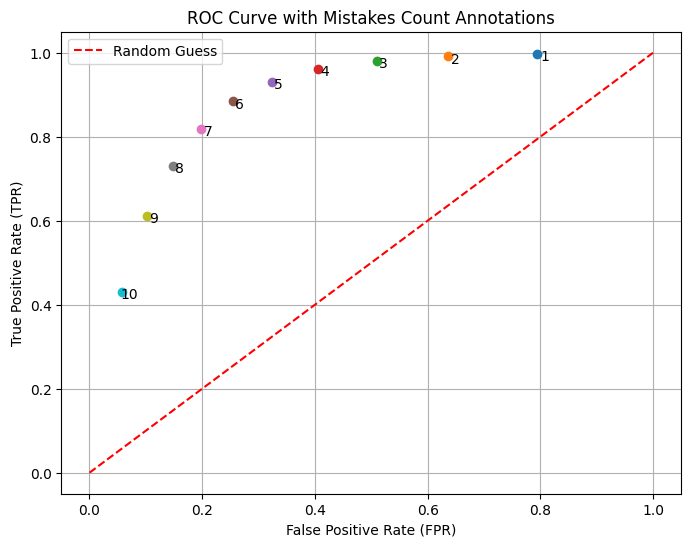

Area Under the Curve (AUC): 0.6646810900562569


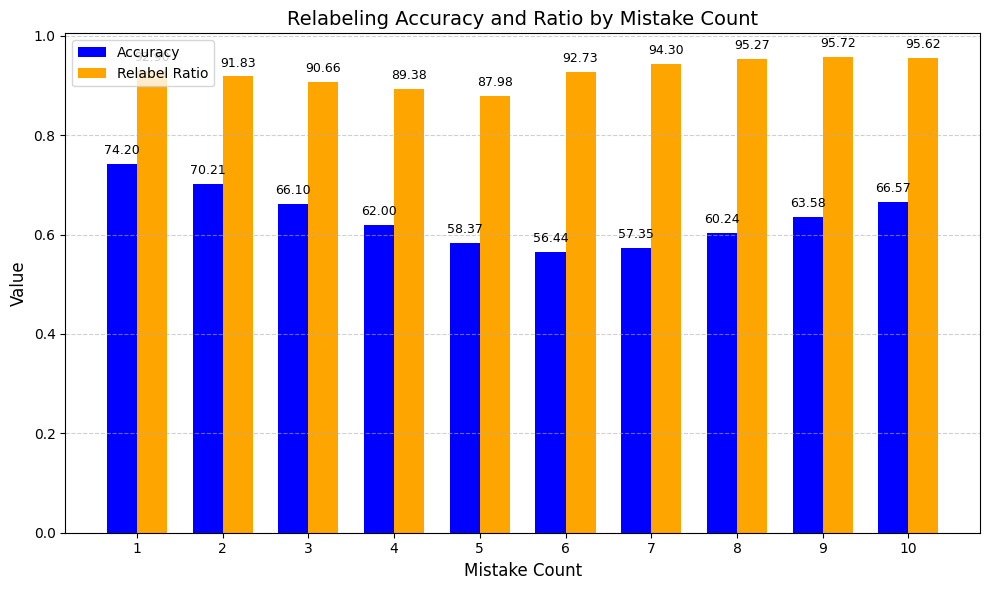

In [4]:
noise_cleaner.analyze()

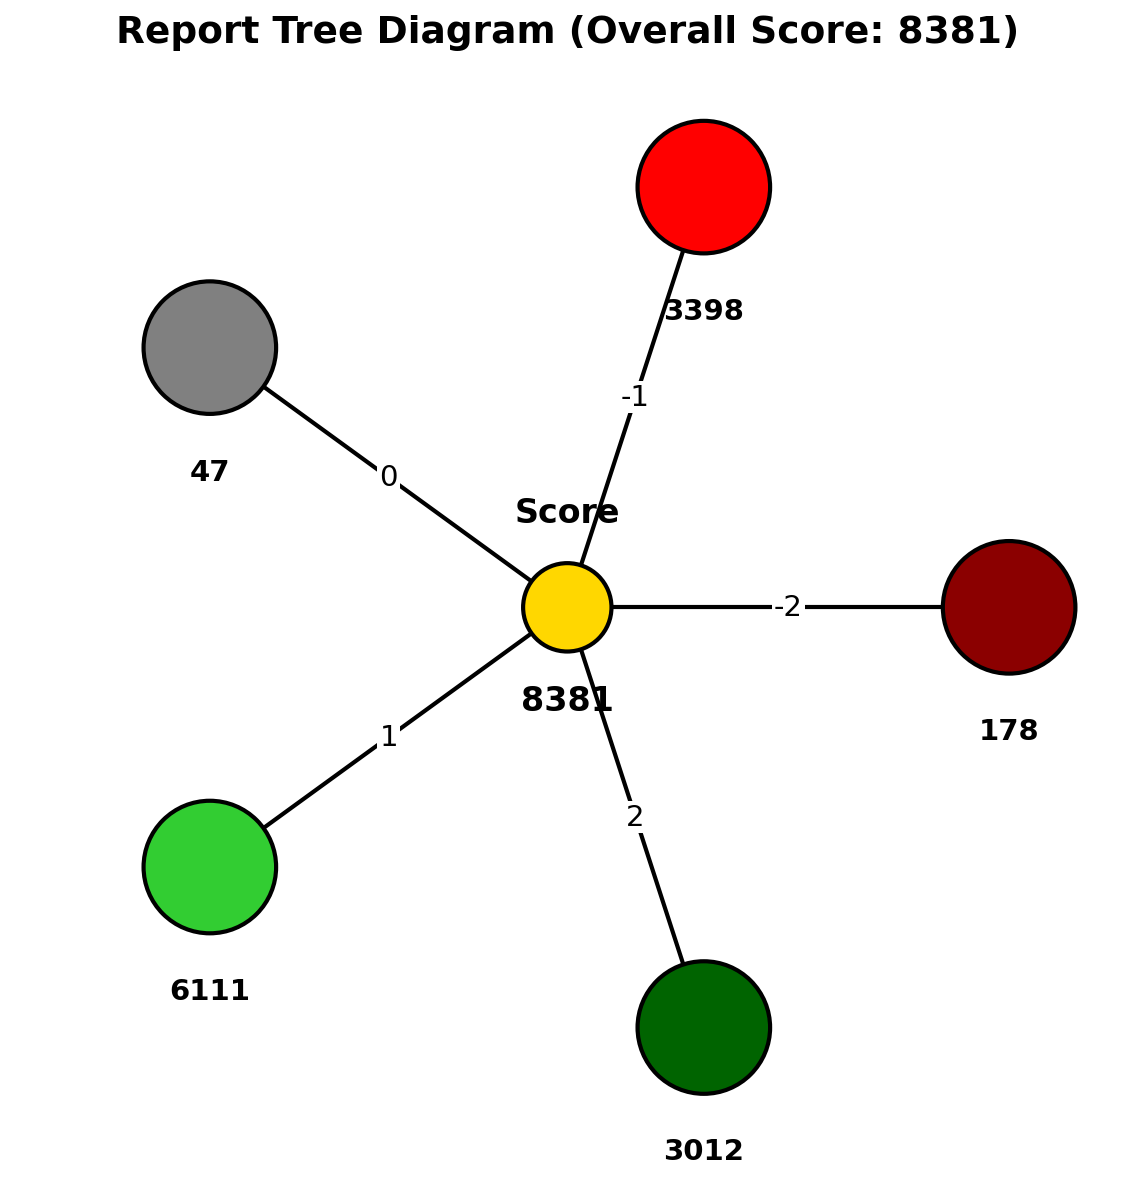

In [3]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=9, relabel_threshold=10)

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



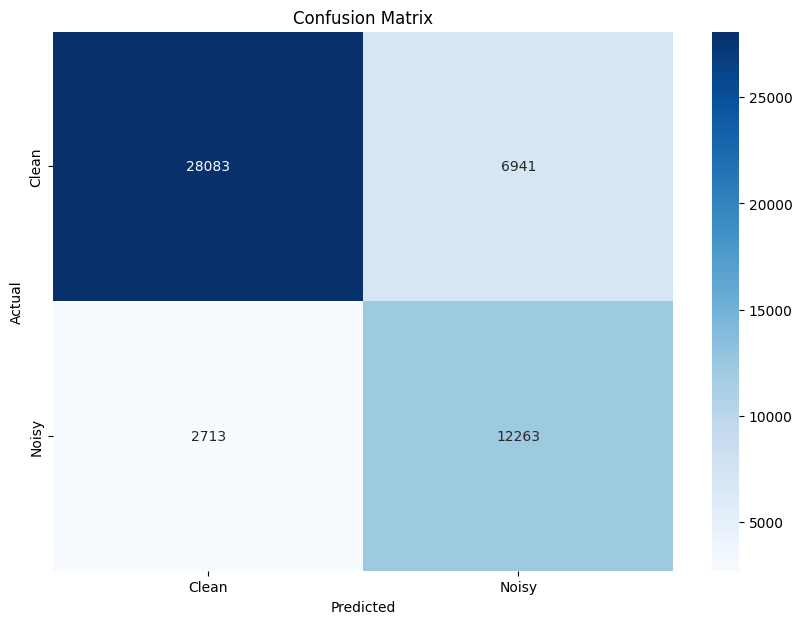

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



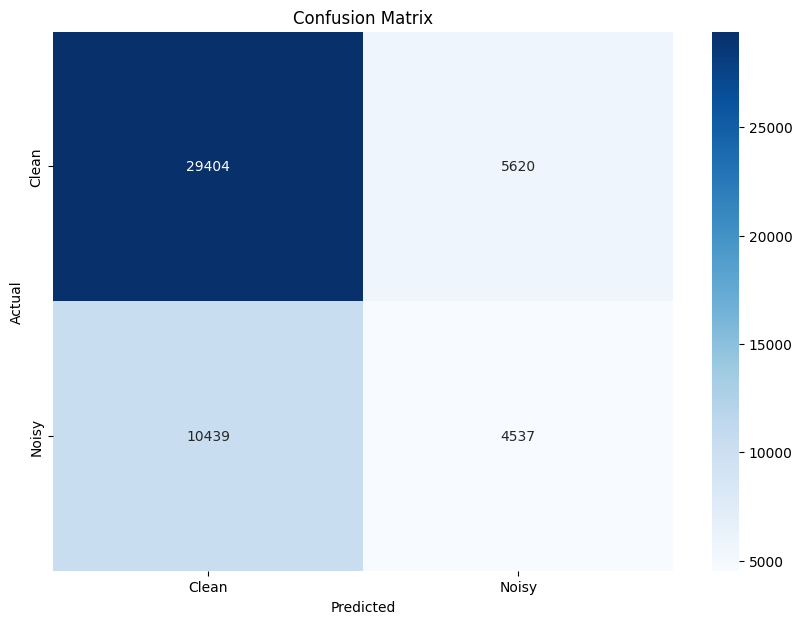

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


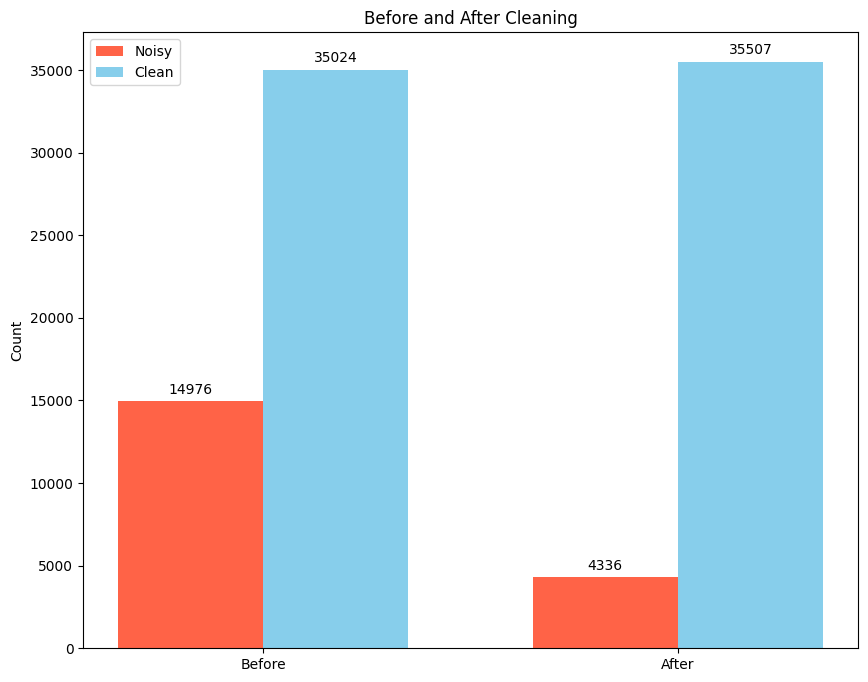

100%|██████████| 39843/39843 [00:01<00:00, 20965.34it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [ ]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

## CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
63.24884792626728% accuracy in 868 data
Loaded 868 noisy indices from cifar10(40)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
68.40148698884758% accuracy in 807 data
Loaded 807 noisy 

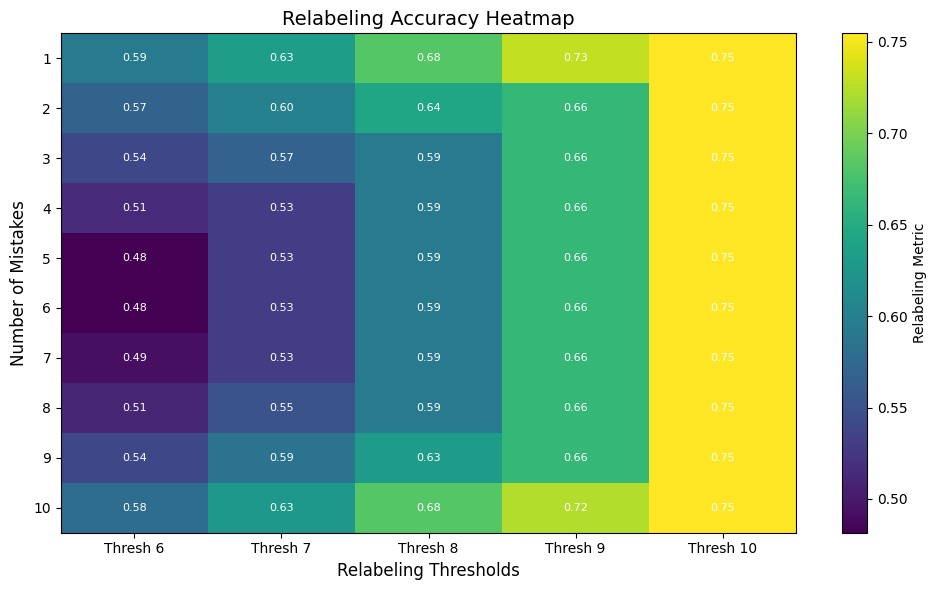

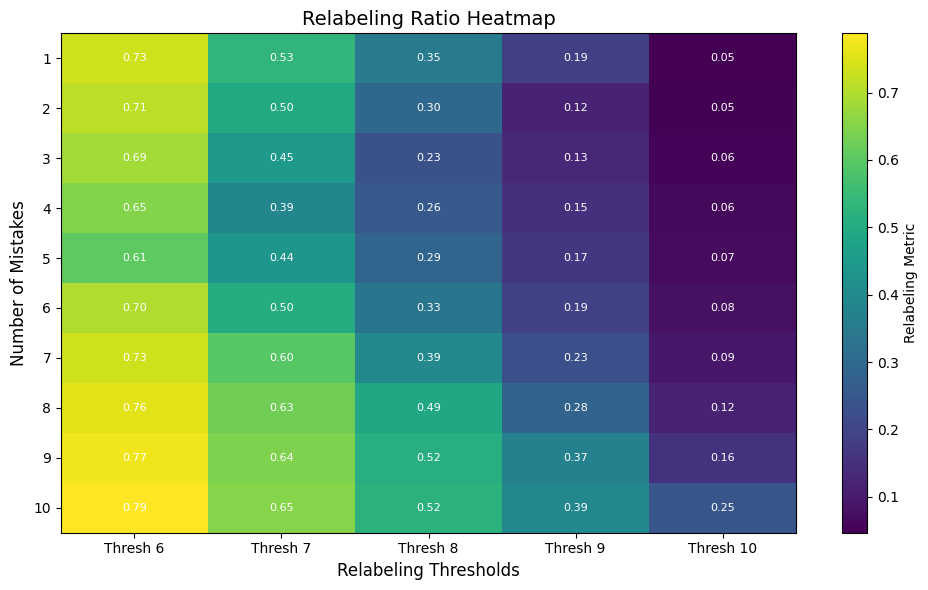

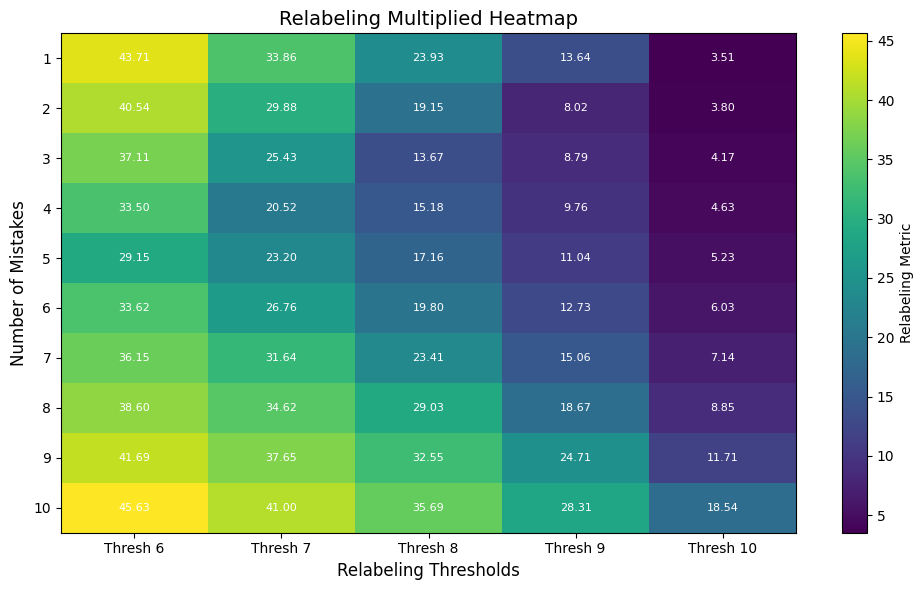

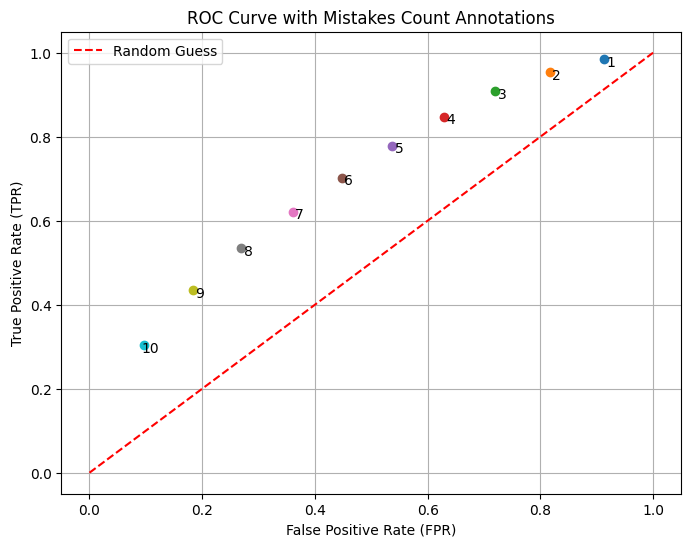

Area Under the Curve (AUC): 0.589056895488616


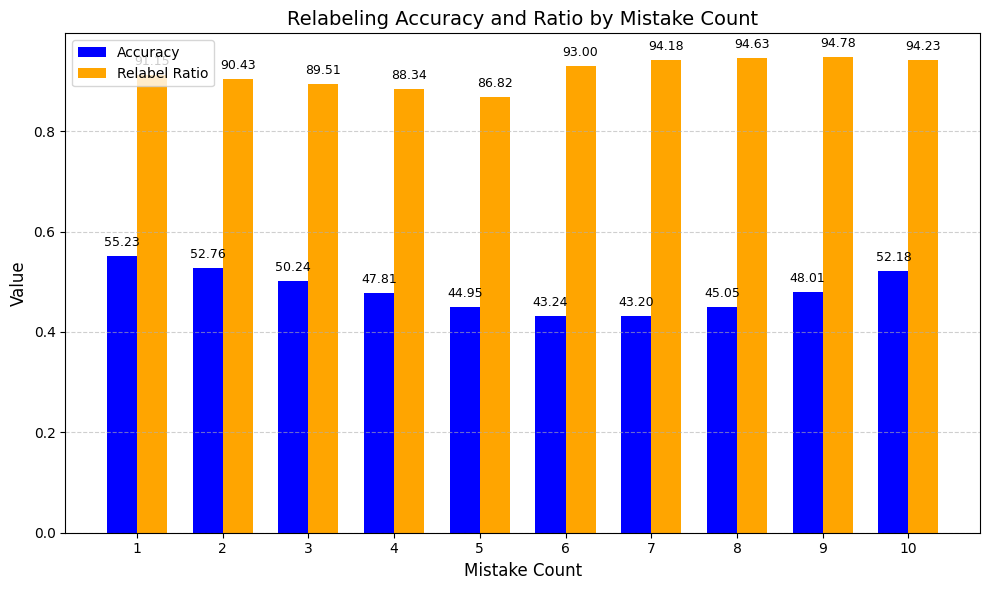

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7206    0.6397    0.6777     30197
       Noisy     0.5309    0.6217    0.5727     19803

    accuracy                         0.6326     50000
   macro avg     0.6257    0.6307    0.6252     50000
weighted avg     0.6454    0.6326    0.6361     50000



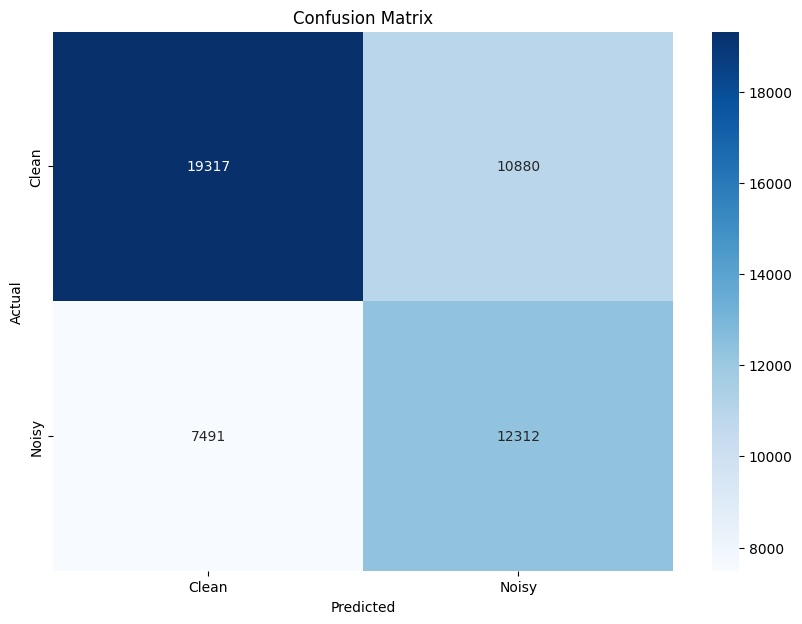

              precision    recall  f1-score   support

       Clean     0.6524    0.6929    0.6720     30197
       Noisy     0.4827    0.4371    0.4588     19803

    accuracy                         0.5916     50000
   macro avg     0.5676    0.5650    0.5654     50000
weighted avg     0.5852    0.5916    0.5876     50000



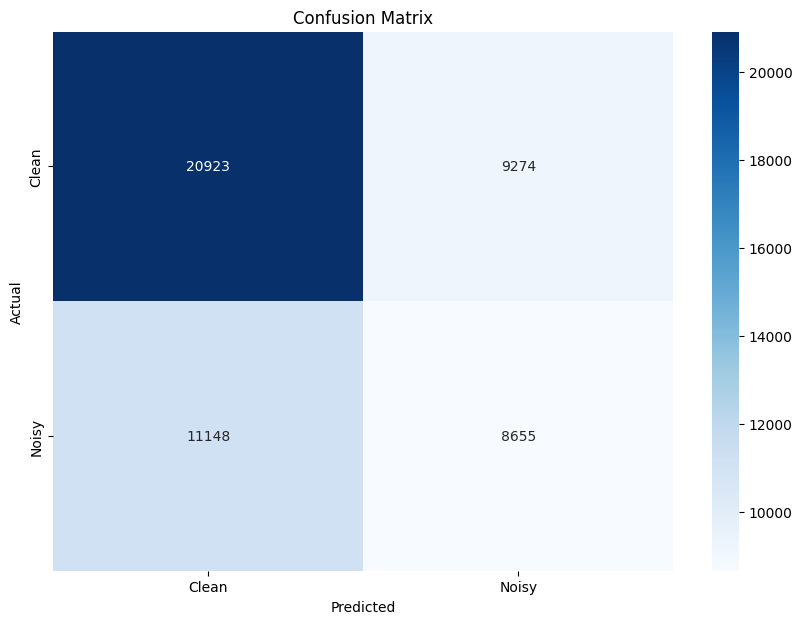

17929 removed from dataset and 5263 relabled
28.88% noise remained in 32071 data


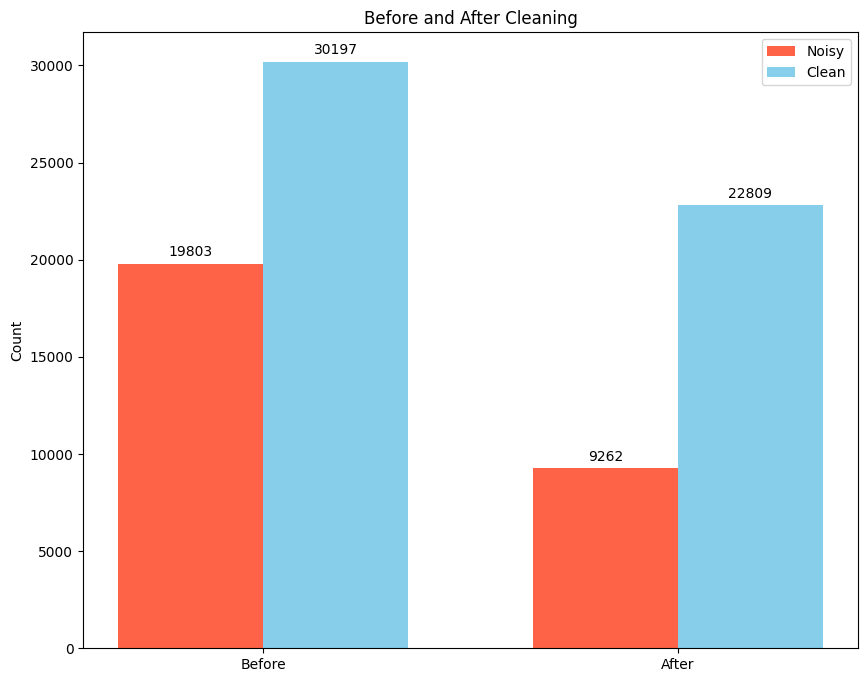

100%|██████████| 32071/32071 [00:01<00:00, 20518.49it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [9]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=9)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

## CIFAR 100 - 20

In [6]:
train_dataset = CIFAR100(root='data', train=True, download=True)
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Optional
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=15, outer_folds_num=15, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=300000, 
                             val_pairs=30000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.4, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=4, freeze_epoch=None, noisy_indices_path='cifar100(128)(20)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar100(128)(20)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(8, 15),
                             num_class=100, siamese_middle_size=100)

Files already downloaded and verified
Seed: 73
noise count: 10180 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
43.688037012557835% accuracy in 1513 data
Loaded 1513 noisy indices from cifar100(128)(20)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
42.885245901639344% accuracy in 1525 data
Loaded 1525 noisy indices from cifar100(128)(20)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
45.39473684210527% accuracy in 1520 data
Loaded 1520 noisy indices from cifar100(128)(20)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
45.38866930171278% accuracy in 1518 data
Loaded 1518 noisy indices from cifar100(128)(20)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
44.45955132562883% accuracy in 1471 data
Loaded 1471 noisy indices from cifar100(128)(20)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
45.08361204013378% accuracy in 1495 data
Loaded 1495 noisy indices from cifar100(128)(20)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
44.06887

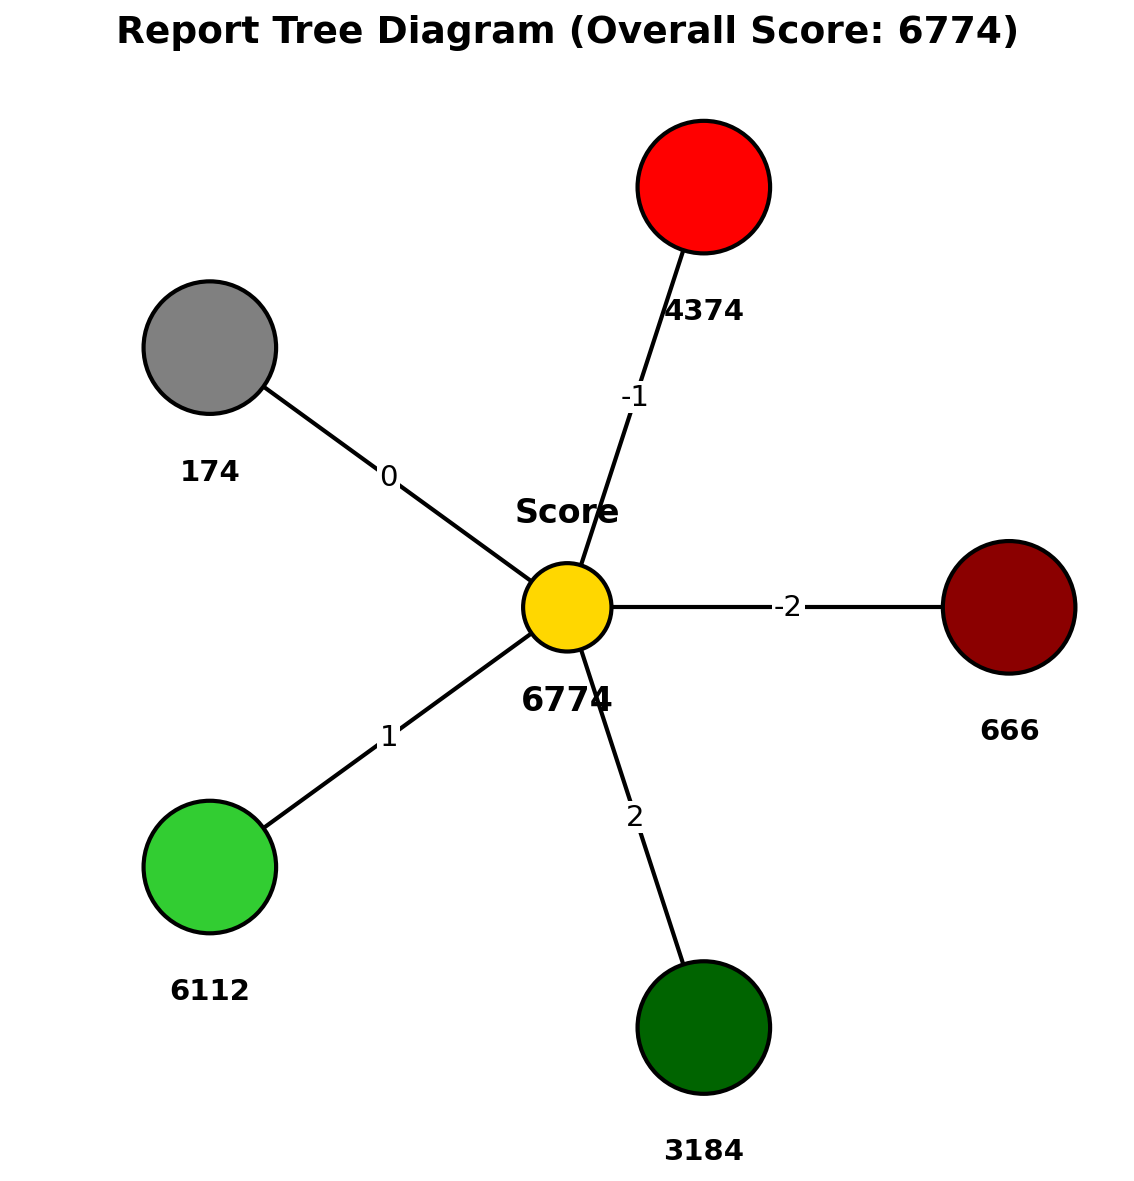

In [11]:
score, relabeling_report = noise_cleaner.calculate_relabeling_score(mistakes_count=15, relabel_threshold=15)

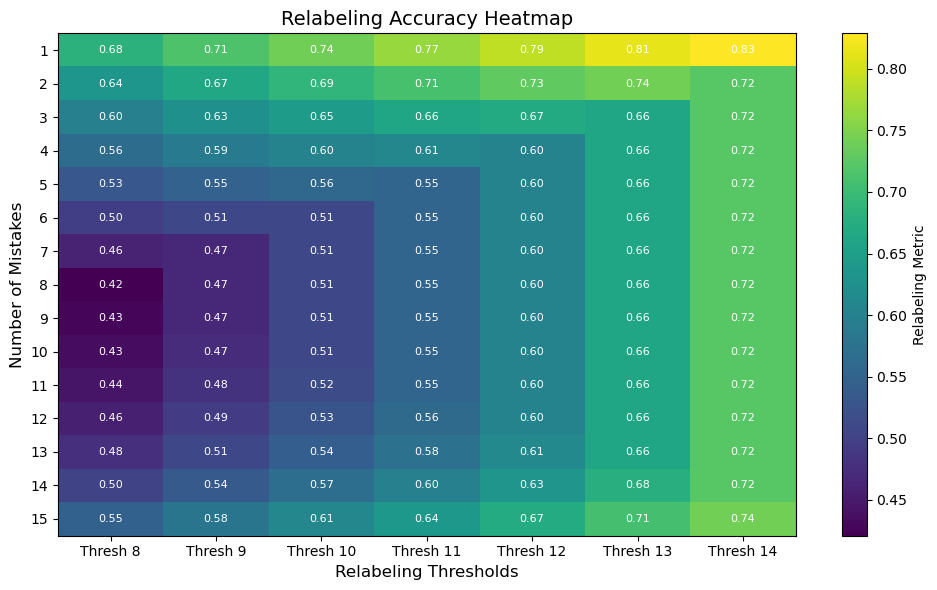

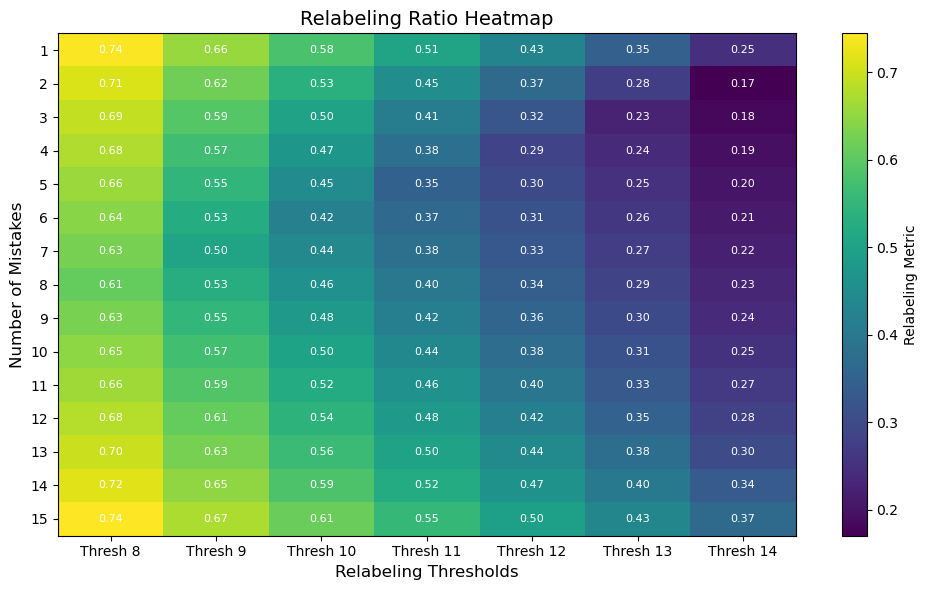

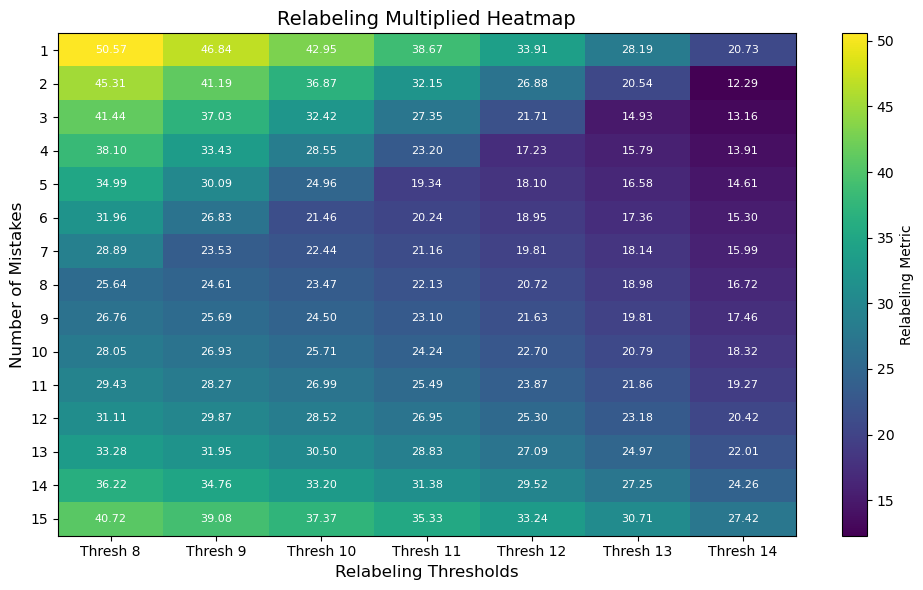

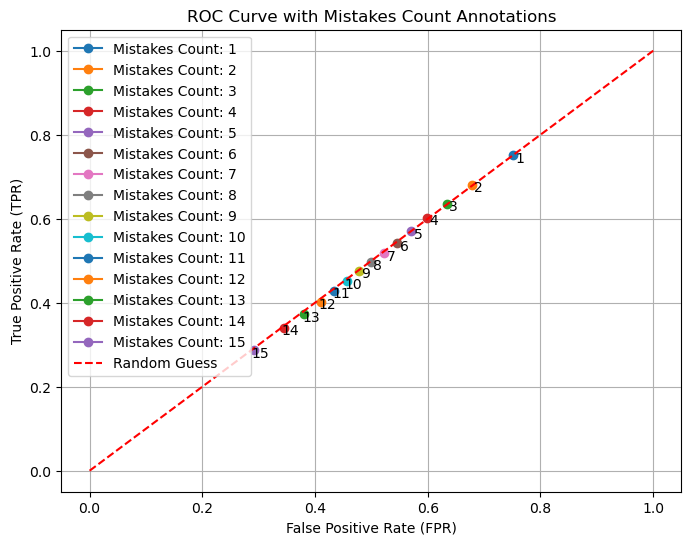

Area Under the Curve (AUC): 0.23858366578878037


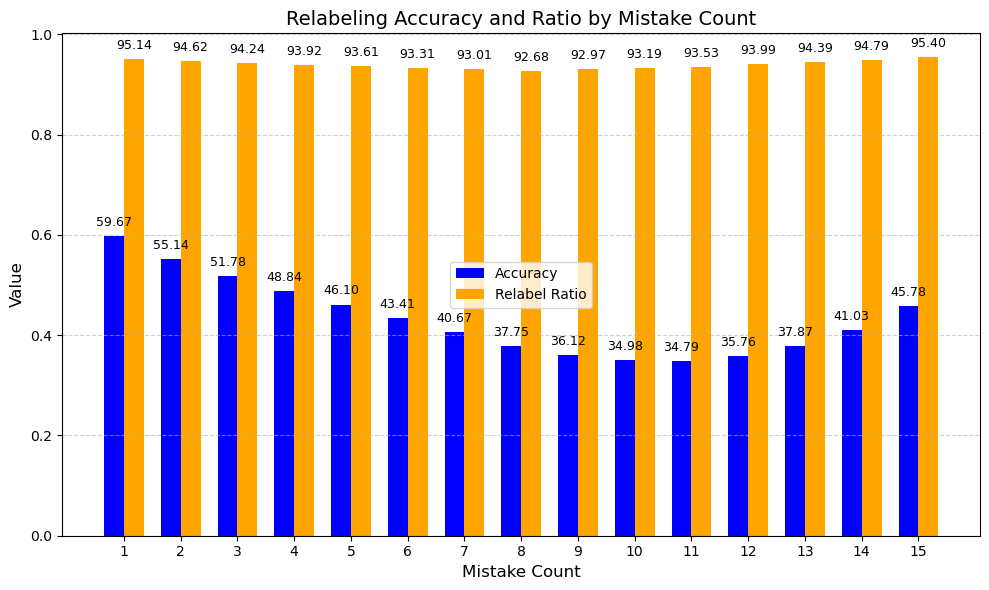

In [7]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



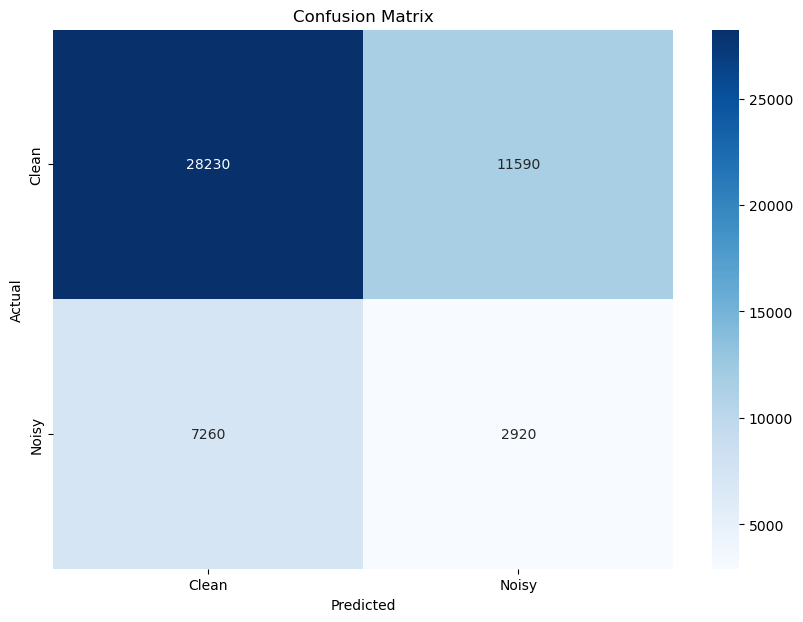

              precision    recall  f1-score   support

       Clean     0.7954    0.7089    0.7497     39820
       Noisy     0.2012    0.2868    0.2365     10180

    accuracy                         0.6230     50000
   macro avg     0.4983    0.4979    0.4931     50000
weighted avg     0.6745    0.6230    0.6452     50000



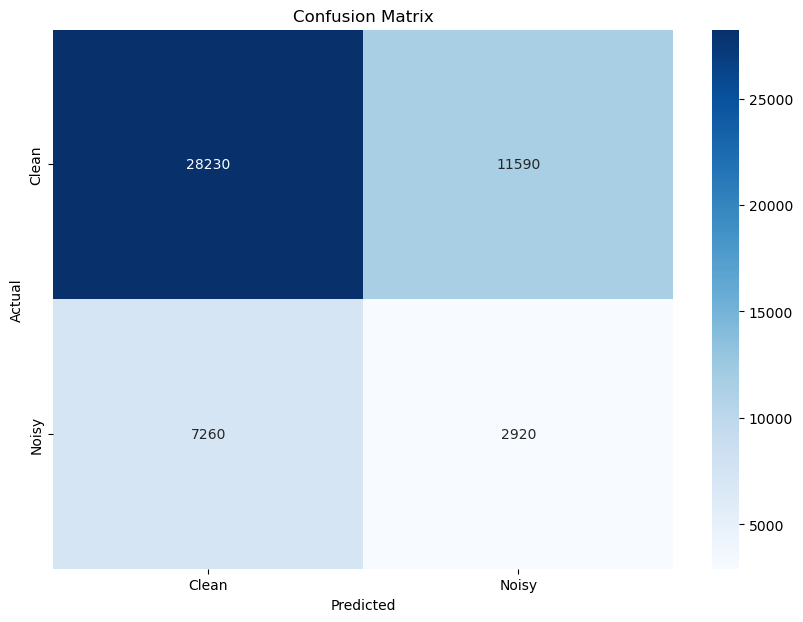

14510 removed from dataset and 0 relabled
20.85% noise remained in 35490 data


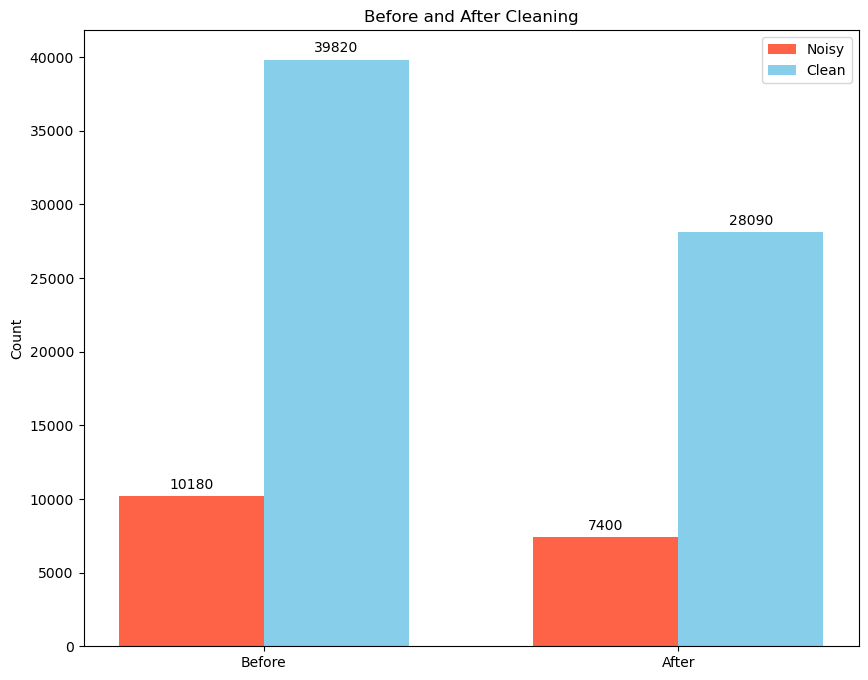

In [10]:
dataset = CIFAR100(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=15, relabel_threshold=-1)

## CIFAR10N

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='cifar10n', model_save_path="cifar10n/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10n/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10n/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
The overall noise rate is 0.09009999999999996
noise count: 4505 out of 50000 data


handling big fold 1/10
number_of_pairs: 3591
Training fold 1/10...


Epoch 0/1000:   0%|          | 0/1000 [00:00<?, ?it/s]/usr/lib/python3.13/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /build/python-pytorch/src/pytorch-rocm/aten/src/ATen/Context.cpp:310.)
  return F.linear(input, self.weight, self.bias)
Epoch 25/1000:   3%|▎         | 26/1000 [43:50<27:22:11, 101.16s/it, val_loss=3.82, val_contrastive=1.49, val_accuracy=79.8, train_loss=3.18, train_contrastive=1.53, best_accuracy=80.4, best_loss=3.82]


Early stopping triggered
Loading best model from checkpoint...


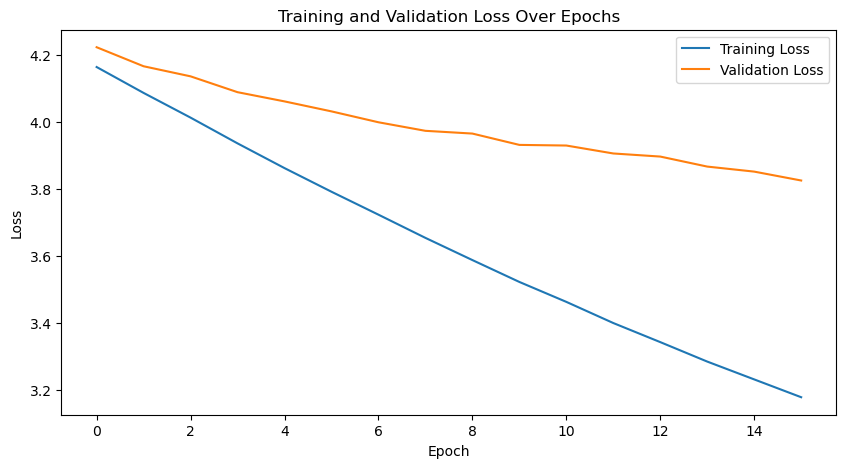

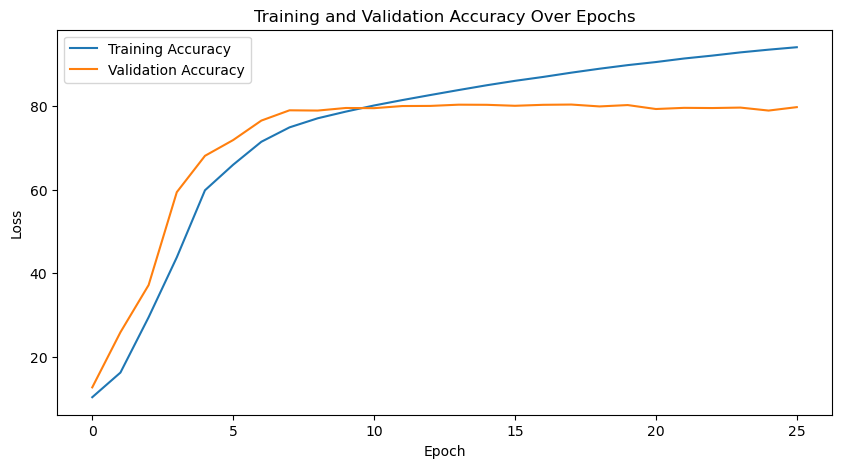

Extracting Embeddings: 100%|██████████| 51/51 [00:01<00:00, 26.94it/s]


Distance between embedding 4933 and 2182: 1.6473
Distance between embedding 4933 and 5445: 1.5757
Distance between embedding 4933 and 2864: 1.5361
Distance between embedding 4933 and 272: 1.9181
Distance between embedding 4933 and 3823: 1.7937
Distance between embedding 4933 and 2010: 1.4751
Distance between embedding 4933 and 959: 1.7254
Distance between embedding 4933 and 3405: 1.4947
Distance between embedding 4933 and 5649: 1.7108
Distance between embedding 4933 and 5038: 1.0957
Distance between embedding 4933 and 304: 1.7392
Distance between embedding 4933 and 460: 1.6193
Distance between embedding 4933 and 4066: 0.9011
Distance between embedding 4933 and 6071: 1.5915
Distance between embedding 4933 and 2873: 1.6384
Distance between embedding 4933 and 3699: 1.5069
Distance between embedding 4933 and 1183: 1.5965
Distance between embedding 4933 and 6037: 1.5745
Distance between embedding 4933 and 4832: 1.4976
Distance between embedding 2182 and 5445: 1.3994
Distance between embeddi

Testing: 100%|██████████| 51/51 [00:01<00:00, 31.75it/s]


Test Accuracy: 80.38%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/1000:   3%|▎         | 30/1000 [51:08<27:33:25, 102.27s/it, val_loss=3.89, val_contrastive=1.49, val_accuracy=79, train_loss=3.2, train_contrastive=1.53, best_accuracy=80.7, best_loss=3.89]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 22.02it/s]


Test Accuracy: 80.66%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 24/1000:   2%|▎         | 25/1000 [42:53<27:52:48, 102.94s/it, val_loss=3.93, val_contrastive=1.55, val_accuracy=80.6, train_loss=3.46, train_contrastive=1.55, best_accuracy=81.2, best_loss=3.93]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.12it/s]


Test Accuracy: 81.23%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 21/1000:   2%|▏         | 22/1000 [37:47<27:59:44, 103.05s/it, val_loss=3.87, val_contrastive=1.55, val_accuracy=80.6, train_loss=3.47, train_contrastive=1.54, best_accuracy=81, best_loss=3.87]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.15it/s]


Test Accuracy: 81.03%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 29/1000:   3%|▎         | 30/1000 [51:36<27:48:46, 103.22s/it, val_loss=3.82, val_contrastive=1.48, val_accuracy=79.2, train_loss=3.28, train_contrastive=1.53, best_accuracy=80.4, best_loss=3.82]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 17.21it/s]


Test Accuracy: 80.38%
Test Precision: 0.81
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 23/1000:   2%|▏         | 24/1000 [41:20<28:01:32, 103.37s/it, val_loss=3.95, val_contrastive=1.53, val_accuracy=79.3, train_loss=3.46, train_contrastive=1.56, best_accuracy=80.2, best_loss=3.95]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 17.35it/s]


Test Accuracy: 80.24%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 23/1000:   2%|▏         | 24/1000 [41:25<28:04:41, 103.57s/it, val_loss=4.03, val_contrastive=1.56, val_accuracy=80, train_loss=3.55, train_contrastive=1.55, best_accuracy=81.6, best_loss=4.02]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 17.12it/s]


Test Accuracy: 81.61%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 25/1000:   3%|▎         | 26/1000 [44:56<28:03:17, 103.69s/it, val_loss=3.82, val_contrastive=1.52, val_accuracy=81.8, train_loss=3.36, train_contrastive=1.53, best_accuracy=82.2, best_loss=3.82]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.78it/s]


Test Accuracy: 82.18%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 24/1000:   2%|▎         | 25/1000 [43:15<28:06:50, 103.81s/it, val_loss=3.84, val_contrastive=1.54, val_accuracy=80.2, train_loss=3.31, train_contrastive=1.52, best_accuracy=81.1, best_loss=3.84]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.88it/s]


Test Accuracy: 81.08%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 58/1000:   6%|▌         | 59/1000 [1:42:04<27:07:57, 103.80s/it, val_loss=3.78, val_contrastive=1.41, val_accuracy=77.6, train_loss=2.71, train_contrastive=1.3, best_accuracy=79.2, best_loss=3.78] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.36it/s]


Test Accuracy: 79.19%
Test Precision: 0.79
Test Recall: 0.79
Test F1 Score: 0.79
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:12<00:00,  1.30s/it]


57.932692307692314% relabeling accuracy


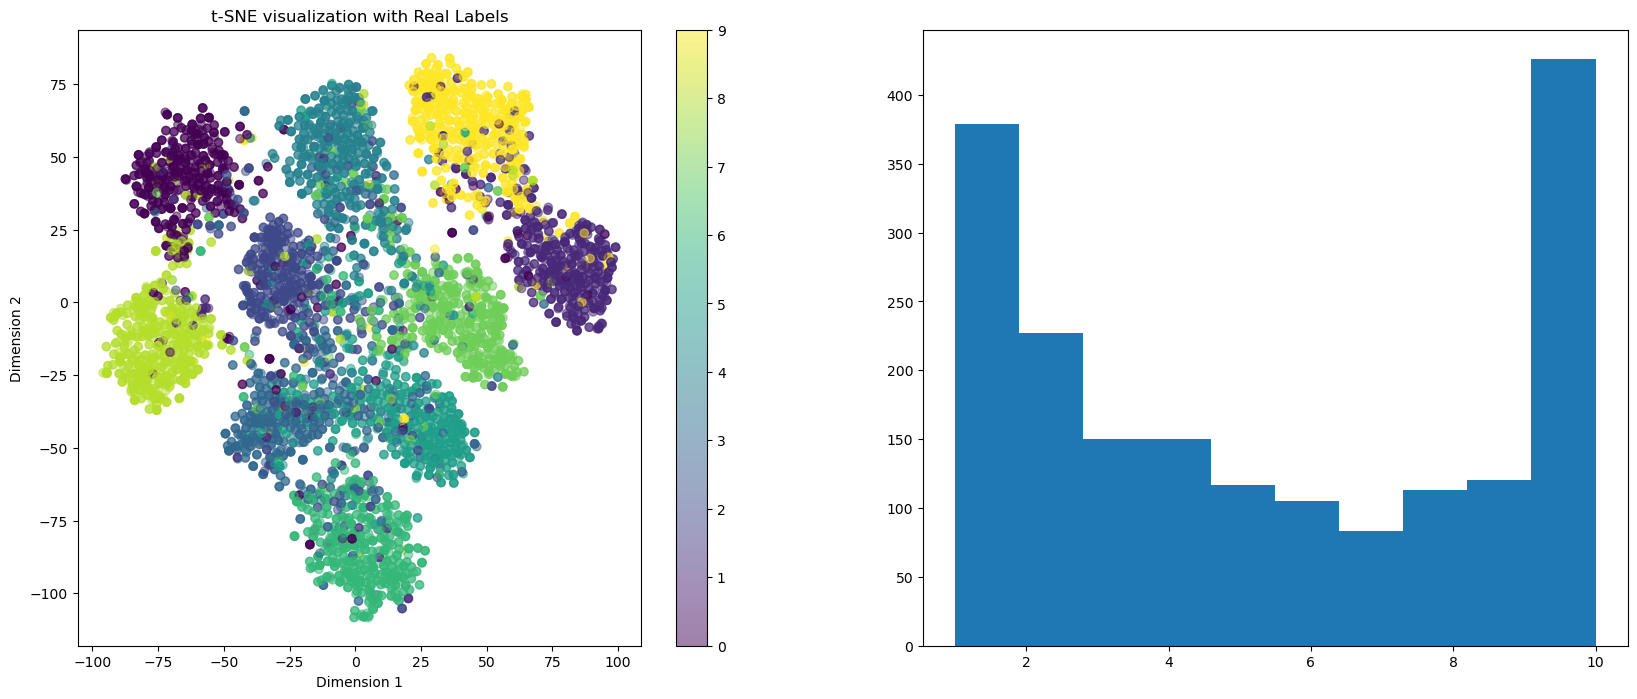

Predicted noise indices: [np.int64(56), np.int64(89), np.int64(208), np.int64(296), np.int64(364), np.int64(481), np.int64(548), np.int64(573), np.int64(602), np.int64(621), np.int64(643), np.int64(660), np.int64(808), np.int64(832), np.int64(986), np.int64(1041), np.int64(1054), np.int64(1174), np.int64(1287), np.int64(1393), np.int64(1745), np.int64(1842), np.int64(1934), np.int64(2118), np.int64(2125), np.int64(2146), np.int64(2671), np.int64(2743), np.int64(2760), np.int64(2960), np.int64(3002), np.int64(3182), np.int64(3379), np.int64(3429), np.int64(3864), np.int64(3925), np.int64(3938), np.int64(3986), np.int64(4020), np.int64(4097), np.int64(4312), np.int64(4336), np.int64(4522), np.int64(4561), np.int64(4786), np.int64(4871), np.int64(5007), np.int64(5193), np.int64(5430), np.int64(5460), np.int64(5528), np.int64(5548), np.int64(5605), np.int64(5892), np.int64(6289), np.int64(6332), np.int64(6364), np.int64(6369), np.int64(6376), np.int64(6466), np.int64(6510), np.int64(6562),

Epoch 28/1000:   3%|▎         | 29/1000 [50:26<28:08:43, 104.35s/it, val_loss=3.9, val_contrastive=1.52, val_accuracy=78.5, train_loss=3.22, train_contrastive=1.53, best_accuracy=80.3, best_loss=3.89] 


Early stopping triggered
Loading best model from checkpoint...


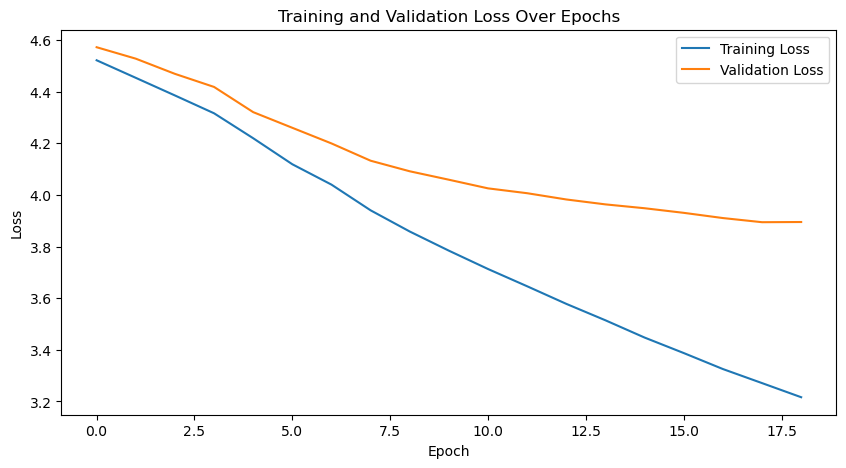

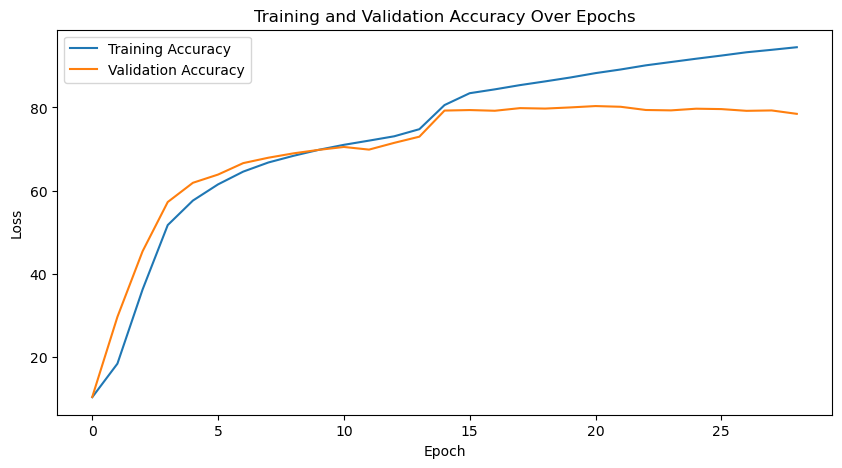

Extracting Embeddings: 100%|██████████| 51/51 [00:03<00:00, 14.33it/s]


Distance between embedding 201 and 5395: 1.4380
Distance between embedding 201 and 5955: 1.3253
Distance between embedding 201 and 3626: 1.4226
Distance between embedding 201 and 4775: 1.4379
Distance between embedding 201 and 184: 1.1925
Distance between embedding 201 and 1495: 1.3039
Distance between embedding 201 and 3514: 1.1380
Distance between embedding 201 and 2261: 1.4670
Distance between embedding 201 and 2868: 1.3868
Distance between embedding 201 and 1302: 1.4025
Distance between embedding 201 and 6138: 1.3985
Distance between embedding 201 and 4745: 1.4432
Distance between embedding 201 and 1782: 1.0584
Distance between embedding 201 and 5064: 1.2567
Distance between embedding 201 and 1555: 0.9964
Distance between embedding 201 and 448: 1.4519
Distance between embedding 201 and 3986: 1.1837
Distance between embedding 201 and 2286: 1.3411
Distance between embedding 201 and 4631: 1.5013
Distance between embedding 5395 and 5955: 1.3936
Distance between embedding 5395 and 3626:

Testing: 100%|██████████| 51/51 [00:03<00:00, 15.49it/s]


Test Accuracy: 80.34%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/1000:   3%|▎         | 30/1000 [52:35<28:20:15, 105.17s/it, val_loss=3.96, val_contrastive=1.53, val_accuracy=78.9, train_loss=3.37, train_contrastive=1.56, best_accuracy=80.6, best_loss=3.96]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 13.44it/s]


Test Accuracy: 80.57%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 24/1000:   2%|▎         | 25/1000 [44:19<28:48:41, 106.38s/it, val_loss=3.99, val_contrastive=1.54, val_accuracy=80.6, train_loss=3.5, train_contrastive=1.57, best_accuracy=81.8, best_loss=3.99] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 12.11it/s]


Test Accuracy: 81.82%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 32/1000:   3%|▎         | 33/1000 [58:46<28:42:07, 106.85s/it, val_loss=3.88, val_contrastive=1.43, val_accuracy=77.5, train_loss=3.05, train_contrastive=1.48, best_accuracy=79, best_loss=3.88]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.44it/s]


Test Accuracy: 78.96%
Test Precision: 0.79
Test Recall: 0.79
Test F1 Score: 0.79
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 23/1000:   2%|▏         | 24/1000 [42:44<28:58:07, 106.85s/it, val_loss=3.82, val_contrastive=1.51, val_accuracy=80.4, train_loss=3.29, train_contrastive=1.53, best_accuracy=81.2, best_loss=3.82]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.49it/s]


Test Accuracy: 81.20%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 22/1000:   2%|▏         | 23/1000 [41:20<29:16:13, 107.85s/it, val_loss=3.89, val_contrastive=1.55, val_accuracy=80.2, train_loss=3.43, train_contrastive=1.56, best_accuracy=81.4, best_loss=3.89]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.50it/s]


Test Accuracy: 81.39%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 27/1000:   3%|▎         | 28/1000 [50:28<29:11:59, 108.15s/it, val_loss=3.82, val_contrastive=1.5, val_accuracy=79.4, train_loss=3.18, train_contrastive=1.52, best_accuracy=80.8, best_loss=3.82] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 10.95it/s]


Test Accuracy: 80.80%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 29/1000:   3%|▎         | 30/1000 [53:56<29:04:11, 107.89s/it, val_loss=3.69, val_contrastive=1.48, val_accuracy=80.9, train_loss=3.04, train_contrastive=1.49, best_accuracy=82.1, best_loss=3.69]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.97it/s]


Test Accuracy: 82.13%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 27/1000:   3%|▎         | 28/1000 [50:26<29:10:53, 108.08s/it, val_loss=3.81, val_contrastive=1.52, val_accuracy=79.6, train_loss=3.27, train_contrastive=1.54, best_accuracy=81.7, best_loss=3.81]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:04<00:00, 11.78it/s]


Test Accuracy: 81.73%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 22/1000:   2%|▏         | 23/1000 [41:26<29:20:41, 108.13s/it, val_loss=3.81, val_contrastive=1.5, val_accuracy=79.2, train_loss=3.29, train_contrastive=1.54, best_accuracy=79.8, best_loss=3.81] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00, 10.00it/s]


Test Accuracy: 79.76%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


56.8075117370892% relabeling accuracy


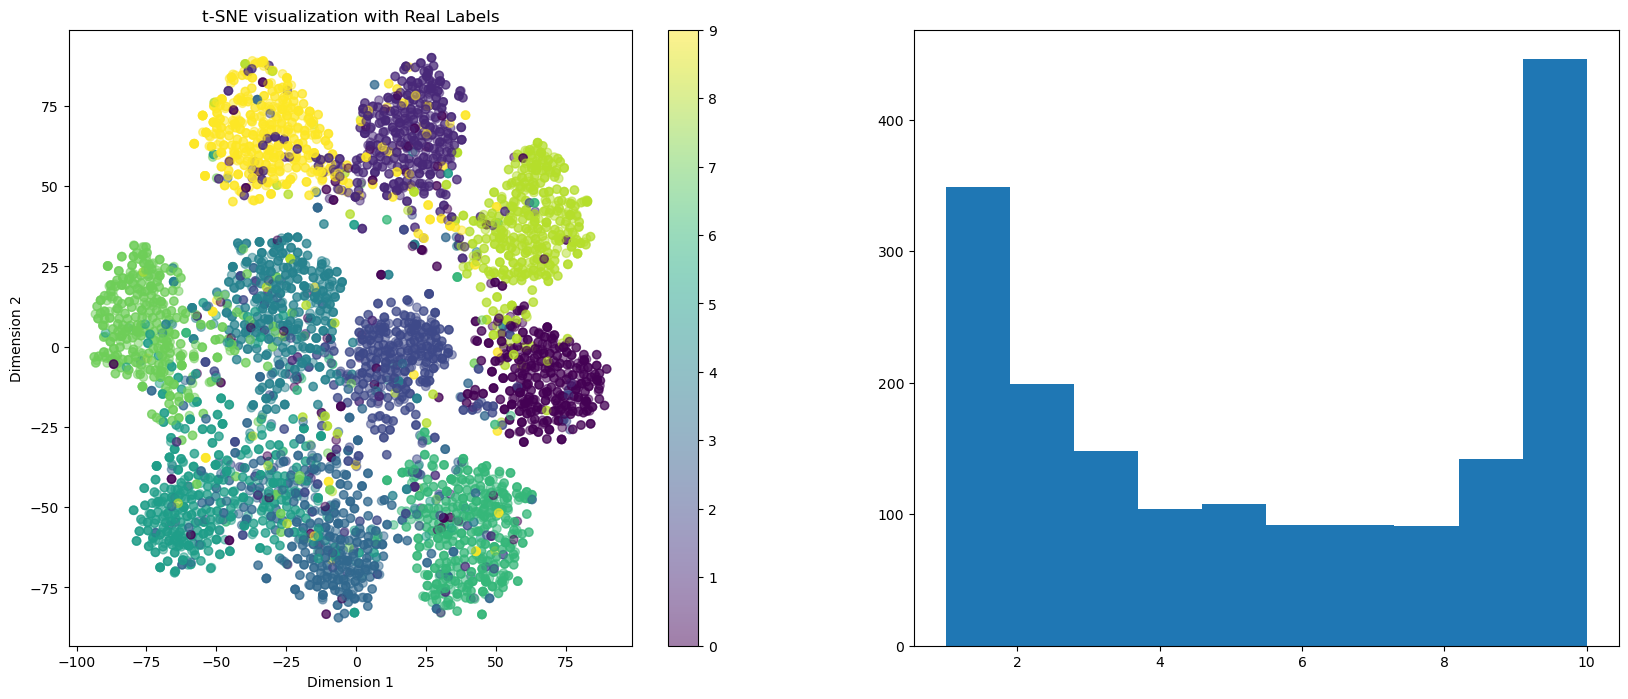

Predicted noise indices: [np.int64(39), np.int64(158), np.int64(258), np.int64(500), np.int64(627), np.int64(635), np.int64(850), np.int64(950), np.int64(1442), np.int64(1499), np.int64(1704), np.int64(1767), np.int64(1787), np.int64(1924), np.int64(1952), np.int64(2061), np.int64(2071), np.int64(2103), np.int64(2168), np.int64(2271), np.int64(2789), np.int64(2853), np.int64(3141), np.int64(3349), np.int64(3459), np.int64(3460), np.int64(3559), np.int64(3572), np.int64(3608), np.int64(3615), np.int64(3684), np.int64(3747), np.int64(4025), np.int64(4394), np.int64(4492), np.int64(4847), np.int64(4937), np.int64(4956), np.int64(4972), np.int64(5074), np.int64(5075), np.int64(5077), np.int64(5218), np.int64(5230), np.int64(5264), np.int64(5327), np.int64(5393), np.int64(5462), np.int64(5470), np.int64(5641), np.int64(5644), np.int64(5706), np.int64(5736), np.int64(5799), np.int64(6045), np.int64(6330), np.int64(6402), np.int64(6424), np.int64(6826), np.int64(6911), np.int64(7113), np.int6

Epoch 20/1000:   2%|▏         | 21/1000 [38:12<29:41:31, 109.18s/it, val_loss=3.94, val_contrastive=1.59, val_accuracy=81.2, train_loss=3.63, train_contrastive=1.59, best_accuracy=82.2, best_loss=3.94]

Early stopping triggered
Loading best model from checkpoint...


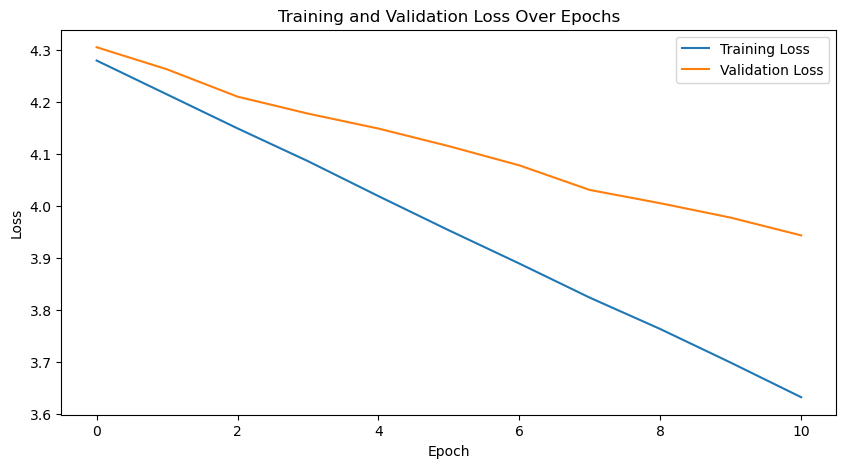

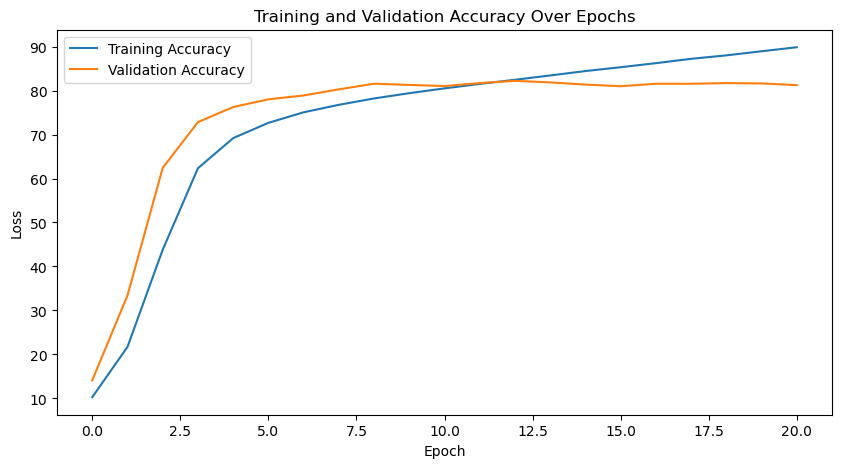

Extracting Embeddings: 100%|██████████| 51/51 [00:05<00:00, 10.15it/s]


Distance between embedding 1232 and 3289: 1.6029
Distance between embedding 1232 and 4894: 1.6273
Distance between embedding 1232 and 2910: 1.7859
Distance between embedding 1232 and 40: 1.4579
Distance between embedding 1232 and 4073: 1.5463
Distance between embedding 1232 and 2527: 1.4696
Distance between embedding 1232 and 5906: 1.7369
Distance between embedding 1232 and 4098: 1.5598
Distance between embedding 1232 and 1432: 1.6510
Distance between embedding 1232 and 481: 1.3454
Distance between embedding 1232 and 2374: 1.5279
Distance between embedding 1232 and 6418: 1.6418
Distance between embedding 1232 and 4323: 1.4064
Distance between embedding 1232 and 4363: 1.6421
Distance between embedding 1232 and 2435: 1.3912
Distance between embedding 1232 and 5335: 1.4507
Distance between embedding 1232 and 5898: 1.4956
Distance between embedding 1232 and 4194: 1.5917
Distance between embedding 1232 and 1657: 1.0887
Distance between embedding 3289 and 4894: 1.4221
Distance between embedd

Testing: 100%|██████████| 51/51 [00:05<00:00, 10.17it/s]


Test Accuracy: 82.21%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 32/1000:   3%|▎         | 33/1000 [1:00:25<29:30:47, 109.87s/it, val_loss=3.75, val_contrastive=1.46, val_accuracy=80.1, train_loss=3.07, train_contrastive=1.49, best_accuracy=81.5, best_loss=3.75]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  9.70it/s]


Test Accuracy: 81.47%
Test Precision: 0.82
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 25/1000:   3%|▎         | 26/1000 [47:59<29:58:00, 110.76s/it, val_loss=3.86, val_contrastive=1.49, val_accuracy=79.6, train_loss=3.25, train_contrastive=1.55, best_accuracy=80.7, best_loss=3.86]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.86it/s]


Test Accuracy: 80.68%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 27/1000:   3%|▎         | 28/1000 [51:55<30:02:35, 111.27s/it, val_loss=3.87, val_contrastive=1.5, val_accuracy=78.7, train_loss=3.18, train_contrastive=1.52, best_accuracy=79.5, best_loss=3.87] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.84it/s]


Test Accuracy: 79.53%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 22/1000:   2%|▏         | 23/1000 [42:44<30:15:31, 111.50s/it, val_loss=3.97, val_contrastive=1.52, val_accuracy=79.5, train_loss=3.53, train_contrastive=1.56, best_accuracy=80.6, best_loss=3.97]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  9.41it/s]


Test Accuracy: 80.63%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 26/1000:   3%|▎         | 27/1000 [50:15<30:11:05, 111.68s/it, val_loss=3.8, val_contrastive=1.5, val_accuracy=79.8, train_loss=3.15, train_contrastive=1.5, best_accuracy=81.1, best_loss=3.8]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.68it/s]


Test Accuracy: 81.14%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 34/1000:   4%|▎         | 35/1000 [1:05:16<29:59:35, 111.89s/it, val_loss=3.79, val_contrastive=1.49, val_accuracy=77.9, train_loss=3.03, train_contrastive=1.5, best_accuracy=80.2, best_loss=3.79] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.62it/s]


Test Accuracy: 80.24%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 27/1000:   3%|▎         | 28/1000 [52:18<30:15:49, 112.09s/it, val_loss=3.97, val_contrastive=1.53, val_accuracy=79, train_loss=3.4, train_contrastive=1.54, best_accuracy=79.7, best_loss=3.97]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  8.46it/s]


Test Accuracy: 79.75%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 22/1000:   2%|▏         | 23/1000 [42:56<30:23:53, 112.01s/it, val_loss=3.89, val_contrastive=1.52, val_accuracy=80.1, train_loss=3.38, train_contrastive=1.54, best_accuracy=80.1, best_loss=3.89]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.76it/s]


Test Accuracy: 80.11%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 31/1000:   3%|▎         | 32/1000 [59:34<30:02:05, 111.70s/it, val_loss=3.81, val_contrastive=1.49, val_accuracy=80.1, train_loss=3.14, train_contrastive=1.5, best_accuracy=81.5, best_loss=3.81] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:05<00:00,  8.51it/s]


Test Accuracy: 81.48%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


59.23423423423423% relabeling accuracy


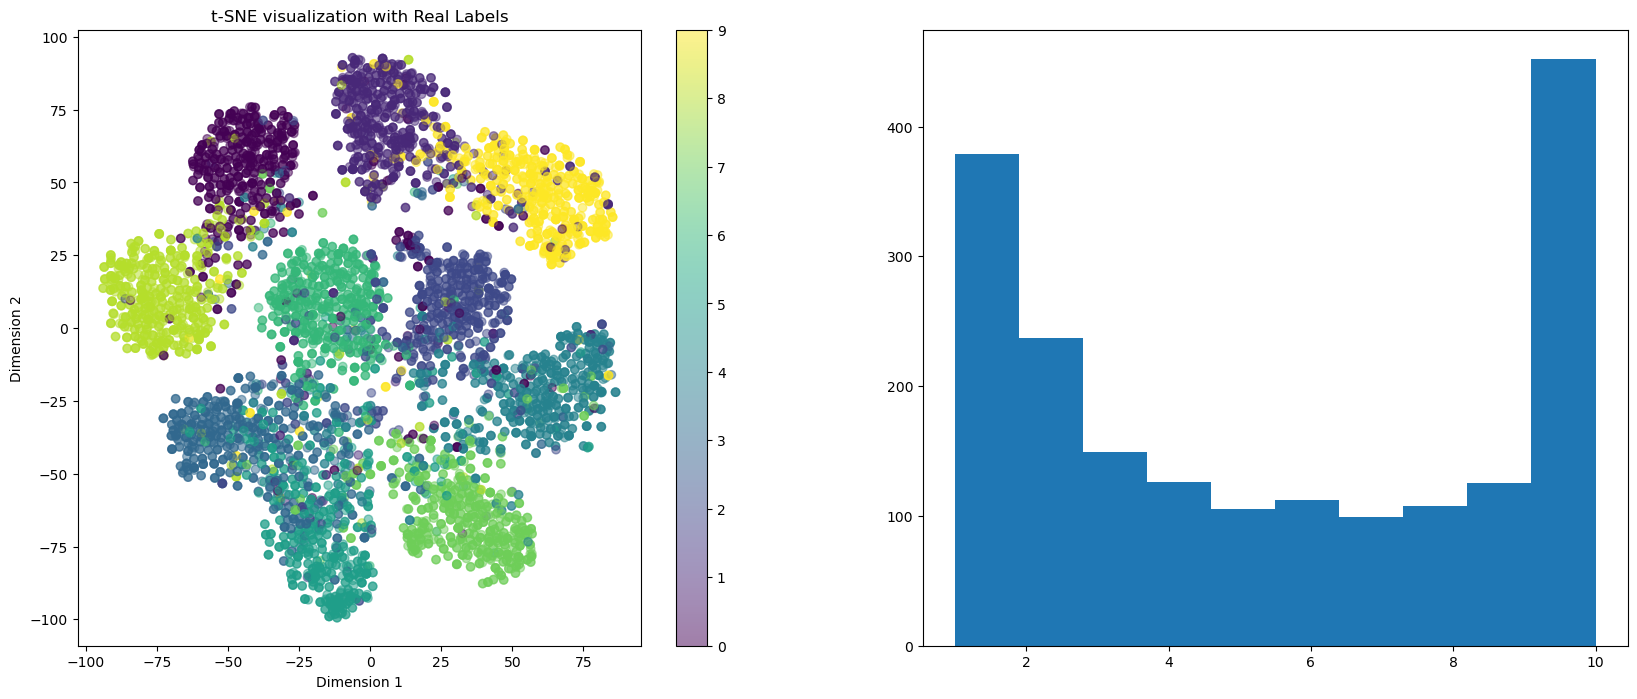

Predicted noise indices: [np.int64(330), np.int64(347), np.int64(493), np.int64(736), np.int64(927), np.int64(953), np.int64(1225), np.int64(1324), np.int64(1425), np.int64(1538), np.int64(1734), np.int64(1765), np.int64(1795), np.int64(1926), np.int64(1942), np.int64(1948), np.int64(2002), np.int64(2087), np.int64(2209), np.int64(2287), np.int64(2337), np.int64(2354), np.int64(2443), np.int64(2813), np.int64(2842), np.int64(2856), np.int64(3190), np.int64(3331), np.int64(3337), np.int64(3385), np.int64(3552), np.int64(3556), np.int64(3810), np.int64(3930), np.int64(4019), np.int64(4034), np.int64(4045), np.int64(4104), np.int64(4137), np.int64(4213), np.int64(4710), np.int64(5124), np.int64(5186), np.int64(5273), np.int64(5346), np.int64(5382), np.int64(5405), np.int64(5451), np.int64(5636), np.int64(5742), np.int64(5816), np.int64(5857), np.int64(6032), np.int64(6125), np.int64(6378), np.int64(6430), np.int64(6452), np.int64(6643), np.int64(6694), np.int64(6729), np.int64(6768), np.i

Epoch 24/1000:   2%|▎         | 25/1000 [46:48<30:25:14, 112.32s/it, val_loss=3.78, val_contrastive=1.51, val_accuracy=81, train_loss=3.24, train_contrastive=1.53, best_accuracy=82.3, best_loss=3.78]  


Early stopping triggered
Loading best model from checkpoint...


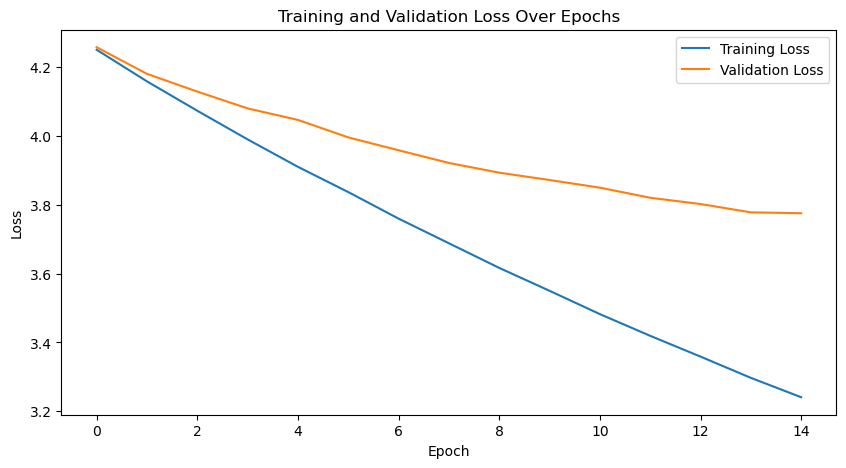

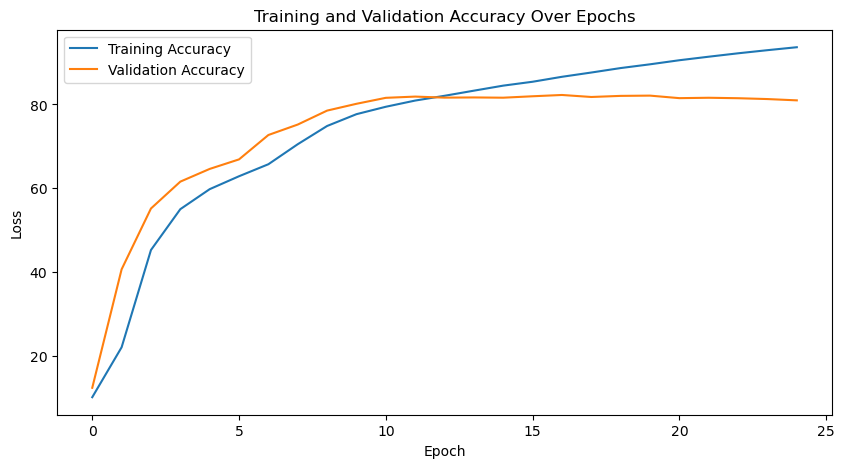

Extracting Embeddings: 100%|██████████| 51/51 [00:06<00:00,  8.11it/s]


Distance between embedding 681 and 3477: 1.5031
Distance between embedding 681 and 476: 1.5562
Distance between embedding 681 and 3070: 1.3744
Distance between embedding 681 and 5471: 1.4409
Distance between embedding 681 and 344: 1.3752
Distance between embedding 681 and 5174: 1.5557
Distance between embedding 681 and 1402: 1.6788
Distance between embedding 681 and 3260: 1.6513
Distance between embedding 681 and 6041: 1.4893
Distance between embedding 681 and 5162: 1.5319
Distance between embedding 681 and 5637: 1.6405
Distance between embedding 681 and 4753: 1.7182
Distance between embedding 681 and 3875: 1.4555
Distance between embedding 681 and 4320: 1.6416
Distance between embedding 681 and 4652: 1.4518
Distance between embedding 681 and 5111: 1.4583
Distance between embedding 681 and 3671: 1.6082
Distance between embedding 681 and 1223: 1.5965
Distance between embedding 681 and 390: 1.4788
Distance between embedding 3477 and 476: 1.4894
Distance between embedding 3477 and 3070: 1

Testing: 100%|██████████| 51/51 [00:06<00:00,  8.38it/s]


Test Accuracy: 82.27%
Test Precision: 0.82
Test Recall: 0.82
Test F1 Score: 0.82
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 31/1000:   3%|▎         | 32/1000 [1:00:08<30:19:19, 112.77s/it, val_loss=3.86, val_contrastive=1.5, val_accuracy=78.1, train_loss=3.13, train_contrastive=1.51, best_accuracy=79.7, best_loss=3.86]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  7.82it/s]


Test Accuracy: 79.75%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 26/1000:   3%|▎         | 27/1000 [51:11<30:45:04, 113.78s/it, val_loss=3.83, val_contrastive=1.51, val_accuracy=79.6, train_loss=3.27, train_contrastive=1.53, best_accuracy=80.6, best_loss=3.83]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  7.07it/s]


Test Accuracy: 80.63%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 24/1000:   2%|▎         | 25/1000 [47:34<30:55:33, 114.19s/it, val_loss=3.73, val_contrastive=1.5, val_accuracy=80.9, train_loss=3.22, train_contrastive=1.53, best_accuracy=81.5, best_loss=3.73] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:06<00:00,  7.35it/s]


Test Accuracy: 81.50%
Test Precision: 0.82
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 26/1000:   3%|▎         | 27/1000 [51:27<30:54:29, 114.36s/it, val_loss=4.15, val_contrastive=1.56, val_accuracy=79.3, train_loss=3.69, train_contrastive=1.56, best_accuracy=80, best_loss=4.15]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  6.88it/s]


Test Accuracy: 80.00%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 23/1000:   2%|▏         | 24/1000 [45:55<31:07:48, 114.82s/it, val_loss=3.96, val_contrastive=1.52, val_accuracy=79, train_loss=3.51, train_contrastive=1.55, best_accuracy=80.4, best_loss=3.96]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  7.13it/s]


Test Accuracy: 80.41%
Test Precision: 0.80
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 22/1000:   2%|▏         | 23/1000 [44:03<31:11:33, 114.94s/it, val_loss=3.85, val_contrastive=1.51, val_accuracy=80, train_loss=3.4, train_contrastive=1.55, best_accuracy=81, best_loss=3.85]     


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  6.97it/s]


Test Accuracy: 81.03%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 25/1000:   3%|▎         | 26/1000 [49:55<31:10:21, 115.22s/it, val_loss=3.8, val_contrastive=1.48, val_accuracy=79, train_loss=3.25, train_contrastive=1.51, best_accuracy=80.5, best_loss=3.8]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  6.96it/s]


Test Accuracy: 80.46%
Test Precision: 0.81
Test Recall: 0.80
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 22/1000:   2%|▏         | 23/1000 [44:19<31:22:46, 115.63s/it, val_loss=3.93, val_contrastive=1.52, val_accuracy=79.8, train_loss=3.4, train_contrastive=1.56, best_accuracy=80.8, best_loss=3.93] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  7.00it/s]


Test Accuracy: 80.77%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 32/1000:   3%|▎         | 33/1000 [1:03:27<30:59:41, 115.39s/it, val_loss=3.71, val_contrastive=1.46, val_accuracy=80, train_loss=2.98, train_contrastive=1.46, best_accuracy=80.5, best_loss=3.71]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:07<00:00,  6.80it/s]


Test Accuracy: 80.51%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.80
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


56.71296296296296% relabeling accuracy


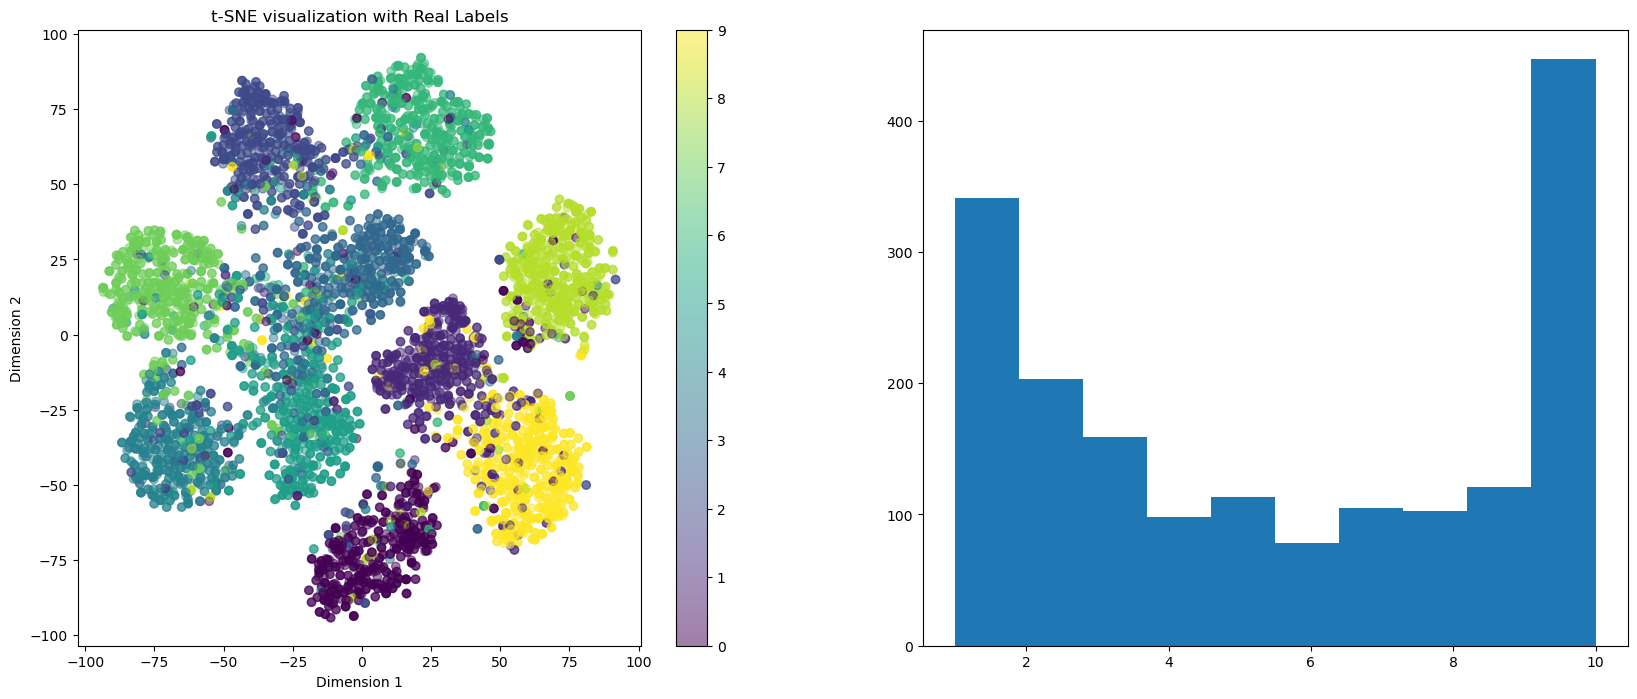

Predicted noise indices: [np.int64(27), np.int64(67), np.int64(70), np.int64(151), np.int64(459), np.int64(553), np.int64(684), np.int64(868), np.int64(1269), np.int64(1346), np.int64(1351), np.int64(1436), np.int64(1509), np.int64(1560), np.int64(1682), np.int64(1724), np.int64(2011), np.int64(2130), np.int64(2239), np.int64(2310), np.int64(2312), np.int64(2663), np.int64(3110), np.int64(3252), np.int64(3308), np.int64(3313), np.int64(3506), np.int64(3517), np.int64(3636), np.int64(3679), np.int64(3802), np.int64(3896), np.int64(3943), np.int64(3956), np.int64(4014), np.int64(4126), np.int64(4184), np.int64(4402), np.int64(4406), np.int64(4756), np.int64(4799), np.int64(4915), np.int64(4964), np.int64(4973), np.int64(5142), np.int64(5372), np.int64(5384), np.int64(5474), np.int64(5596), np.int64(5633), np.int64(5655), np.int64(5703), np.int64(5754), np.int64(5756), np.int64(5773), np.int64(5788), np.int64(5876), np.int64(5963), np.int64(6023), np.int64(6112), np.int64(6151), np.int64(

Epoch 22/1000:   2%|▏         | 23/1000 [44:24<31:26:35, 115.86s/it, val_loss=3.93, val_contrastive=1.56, val_accuracy=80, train_loss=3.54, train_contrastive=1.57, best_accuracy=80.6, best_loss=3.93]  


Early stopping triggered
Loading best model from checkpoint...


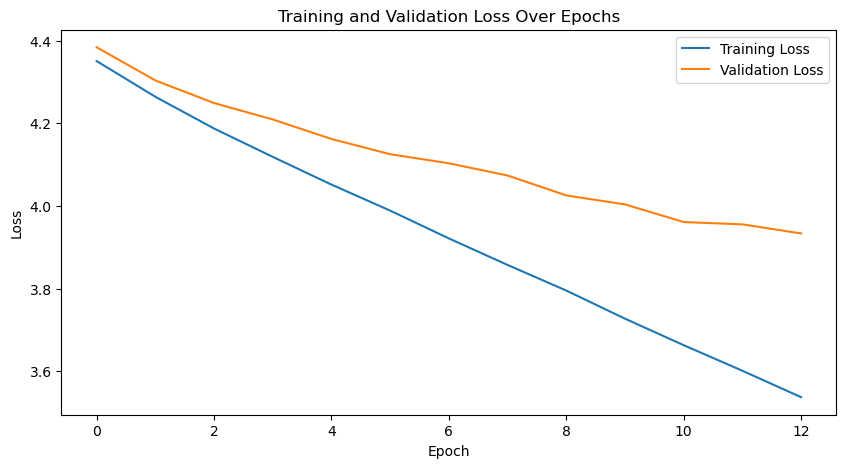

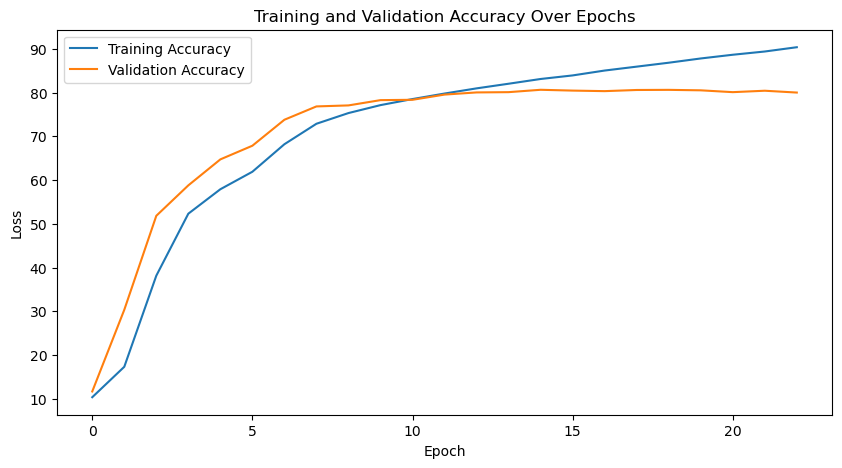

Extracting Embeddings: 100%|██████████| 51/51 [00:07<00:00,  6.55it/s]


Distance between embedding 2845 and 3214: 1.2403
Distance between embedding 2845 and 127: 1.6126
Distance between embedding 2845 and 2459: 1.2561
Distance between embedding 2845 and 3297: 1.5442
Distance between embedding 2845 and 5338: 1.3862
Distance between embedding 2845 and 4329: 1.4615
Distance between embedding 2845 and 557: 1.5255
Distance between embedding 2845 and 772: 1.1750
Distance between embedding 2845 and 1768: 1.4947
Distance between embedding 2845 and 1857: 1.3300
Distance between embedding 2845 and 6181: 1.2135
Distance between embedding 2845 and 5948: 1.3132
Distance between embedding 2845 and 4986: 1.4824
Distance between embedding 2845 and 3695: 0.6776
Distance between embedding 2845 and 1568: 1.3070
Distance between embedding 2845 and 321: 1.1257
Distance between embedding 2845 and 3973: 1.4779
Distance between embedding 2845 and 5085: 1.6153
Distance between embedding 2845 and 2857: 0.7741
Distance between embedding 3214 and 127: 1.2034
Distance between embeddin

Testing: 100%|██████████| 51/51 [00:07<00:00,  6.81it/s]


Test Accuracy: 80.65%
Test Precision: 0.81
Test Recall: 0.81
Test F1 Score: 0.81
Model saved to cifar10n/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 21/1000:   2%|▏         | 21/1000 [40:49<31:42:36, 116.61s/it, val_loss=3.81, val_contrastive=1.53, val_accuracy=80.1, train_loss=3.35, train_contrastive=1.55, best_accuracy=80.7, best_loss=3.81]

In [ ]:
noise_cleaner.clean()